### Projet Machine Learning : Notebook R

Nous voulons étudier le jeu de données "Global Data on Sustainable Energy" (2000-2020) issu du site KAGGLE dans l'objectif de prédire la valeur du C02.

In [2]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(dplyr)
library(naniar)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement 

### I. Analyse exploratoire des données

Pour ce faire nous commençons par effectuer une analyse exploratoire des données afin de nous familiariser avec celles-ci et de les préparer aux phases de modélisation pour en tirer de nouvelles conclusions.

1. Commencez par vérifier la nature des différentes variables et leur encodage. Convertissez la variable Year en une variable qualitative. N.B. Curieusement, la variable Density (P/Km2) n’est pas considérée comme une variable numérique. Convertissez-là en une variable numérique en prenant soin dene pas transformer les nombre décimaux en NA.


Nous commençons par importer le dataframe sur le notebook puis nous l'affichons afin d'avoir un aperçu des données : le nom des colonnes, la nature des variables, ...

In [3]:
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
df <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", dec="." ,header = TRUE)
# Premières lignes du jeu de données
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.P.Km2. Land

In [4]:
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.P.Km2. Land

In [5]:
print("---Variable Year---")

df[,"Year"] <- as.factor(df[,"Year"])
summary(df["Year"])

print("---Variable Entity---")

df[,"Entity"] <- as.factor(df[,"Entity"])
summary(df["Entity"])

print("---Variable Density.P.Km2.---")

df[,"Density.P.Km2."] <- as.numeric(gsub(",",".",(df[,"Density.P.Km2."])))
summary(df["Density.P.Km2."])

df_na <- df #on stocke df avec les valeurs NA pour la partie 'complétion de variables'

[1] "---Variable Year---"


      Year     
 2013   : 175  
 2014   : 175  
 2015   : 175  
 2016   : 175  
 2017   : 175  
 2018   : 175  
 (Other):2599  

[1] "---Variable Entity---"


                 Entity    
 Afghanistan        :  21  
 Albania            :  21  
 Algeria            :  21  
 Angola             :  21  
 Antigua and Barbuda:  21  
 Argentina          :  21  
 (Other)            :3523  

[1] "---Variable Density.P.Km2.---"


 Density.P.Km2.    
 Min.   :   1.265  
 1st Qu.:  26.000  
 Median :  81.000  
 Mean   : 137.058  
 3rd Qu.: 203.000  
 Max.   :1281.000  
 NA's   :1         

2. Déterminez le taux de valeurs manquantes pour chaque variable.
On propose de supprimer pour ce projet les variables comportant un taux de données manquantes très im-
portant: Renewable-electricity-generating-capacity-per-capita, Financial flows to developing
countries (US Dollars) et Renewables (% equivalent primary energy).

On affiche ici la proportion de valeurs manquantes pour chacune des variables : 

[1] "0 : Entity"
[1] "0 : Year"
[1] "0.274047684297068 : Access.to.electricity....of.population."
[1] "4.63140586462044 : Access.to.clean.fuels.for.cooking"
[1] "25.513839408057 : Renewable.electricity.generating.capacity.per.capita"
[1] "57.2485612496574 : Financial.flows.to.developing.countries..US..."
[1] "5.31652507536311 : Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] "0.575500137023842 : Electricity.from.fossil.fuels..TWh."
[1] "3.45300082214305 : Electricity.from.nuclear..TWh."
[1] "0.575500137023842 : Electricity.from.renewables..TWh."
[1] "1.15100027404768 : Low.carbon.electricity....electricity."
[1] "0 : Primary.energy.consumption.per.capita..kWh.person."
[1] "5.6727870649493 : Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] "11.7292408879145 : Value_co2_emissions_kt_by_country"
[1] "58.5639901342834 : Renewables....equivalent.primary.energy."
[1] "8.68731159221705 : gdp_growth"
[1] "7.72814469717731 : gdp_per_capita"
[1] "0.027404768

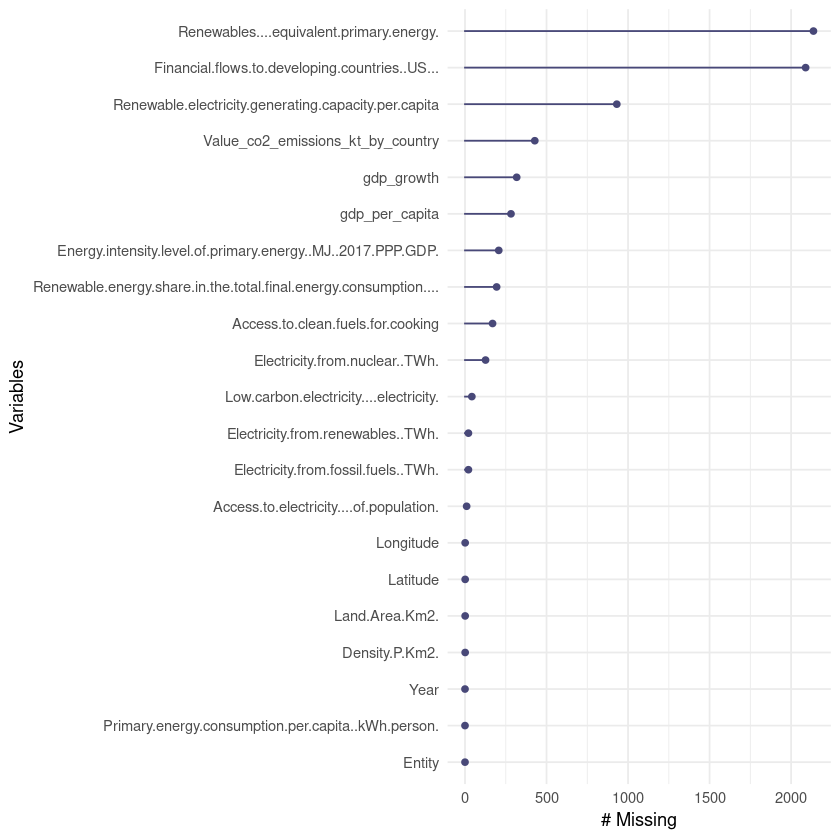

In [6]:
for (i in names(df))
  print(paste(sum(is.na(df[i])/nrow(df)*100) ,":", i))

gg_miss_var(df)

In [7]:
df <- subset(df, select = -c(Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.))

On enlève donc les colonnes inutiles, car présentant trop de données manquantes : 'Renewable.electricity.generating.capacity.per.capita', 'Financial.flows.to.developing.countries..US...', 'Renewables....equivalent.primary.energy.'.

In [8]:
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.31                              65.95744                              
2 0.50                              84.74577                              
3 0.56                              81.15942                              
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.P.Km2.
1  760                                     NA        NA       60            
2  730                                     NA        NA       60            
3 1030                                     NA  179.4266       60            
4 1220                               8.832278  190.6838       60            
5 1030                               1.414118  211.3821       60            
6 1550                              11.229715  242.0313       60            
  Land.Area.Km2. Latitude Longitude
1 652230         33.93911 67.70995 
2 652230         33.93911 67.70995 
3 652230         33.93911 67.70995 
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995

3. Pour la suite de l’étude, vous allez créer un jeu de données comportant seulement les individus qui n’ont
pas de valeur manquante. Il reste alors 2868 observations

Nous modifions une nouvelle fois notre dataframe en supprimant maintenant toutes les lignes qui comportent au moins une valeur manquante.

In [9]:
df <- na.omit(df)

In [10]:
print(paste("Le jeu de données contient désormais",nrow(df),"lignes, après avoir supprimé les lignes comportant des valeurs manquantes"))

[1] "Le jeu de données contient désormais 2868 lignes, après avoir supprimé les lignes comportant des valeurs manquantes"


4. Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?

Après avoir bien formaté notre dataframe nous pouvons passer à l'analyse descriptive de nos données. On commence par afficher les caractéristiques statistiques descriptives liées à nos données.

In [11]:
summary(df)

                 Entity          Year     
 Algeria            :  20   2014   : 147  
 Angola             :  20   2015   : 147  
 Antigua and Barbuda:  20   2016   : 146  
 Argentina          :  20   2017   : 146  
 Armenia            :  20   2018   : 146  
 Australia          :  20   2019   : 146  
 (Other)            :2748   (Other):1990  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :  1.252                         Min.   :  0.00                   
 1st Qu.: 53.238                         1st Qu.: 22.07                   
 Median : 97.000                         Median : 81.55                   
 Mean   : 76.585                         Mean   : 62.17                   
 3rd Qu.:100.000                         3rd Qu.:100.00                   
 Max.   :100.000                         Max.   :100.00                   
                                                                          
 Renewable.energy.share.in.the.total.final.energy.consum

Avec le tableau ci-dessus, on se rend compte que beaucoup de variables prennent des grandes plages de valeurs. Par exemple, la variable 'Primary energy consumption per capita (kWh/person)' prend des valeurs entre 105 et 262585, avec une moyenne de 26082. Cette grosse différence d'echelle au sein d'une même colonne nous met sur la piste d'une potentielle transformation logarithmique des données.

Ci-dessous, nous allons afficher les données ainsi que leurs transformations logarithmiques, afin de se rendre compte graphiquement pour quelles variables la transformation est pertinente.

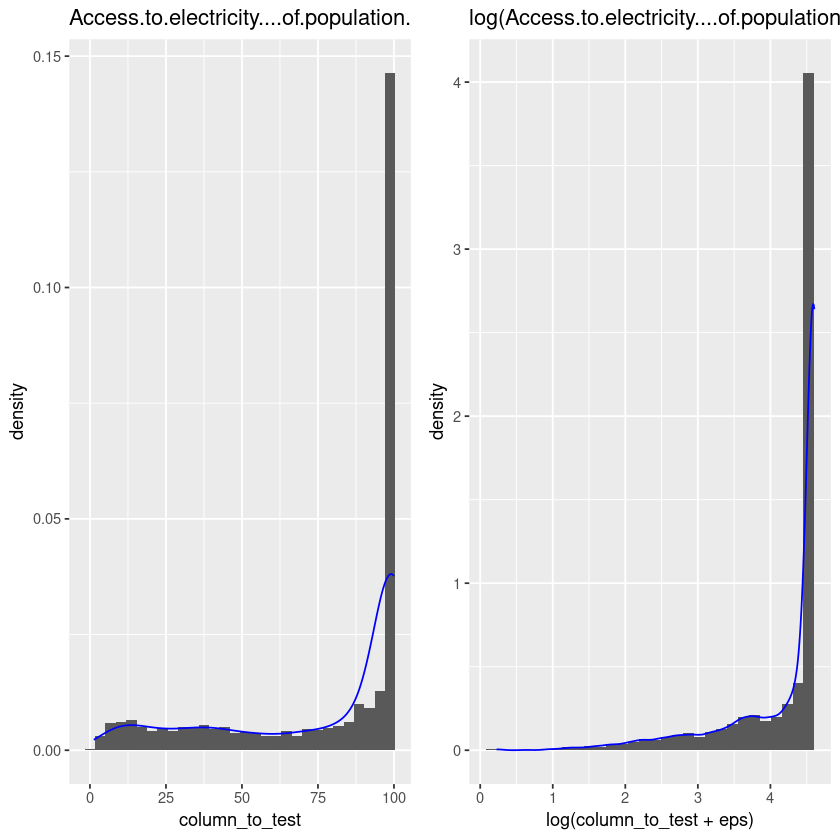

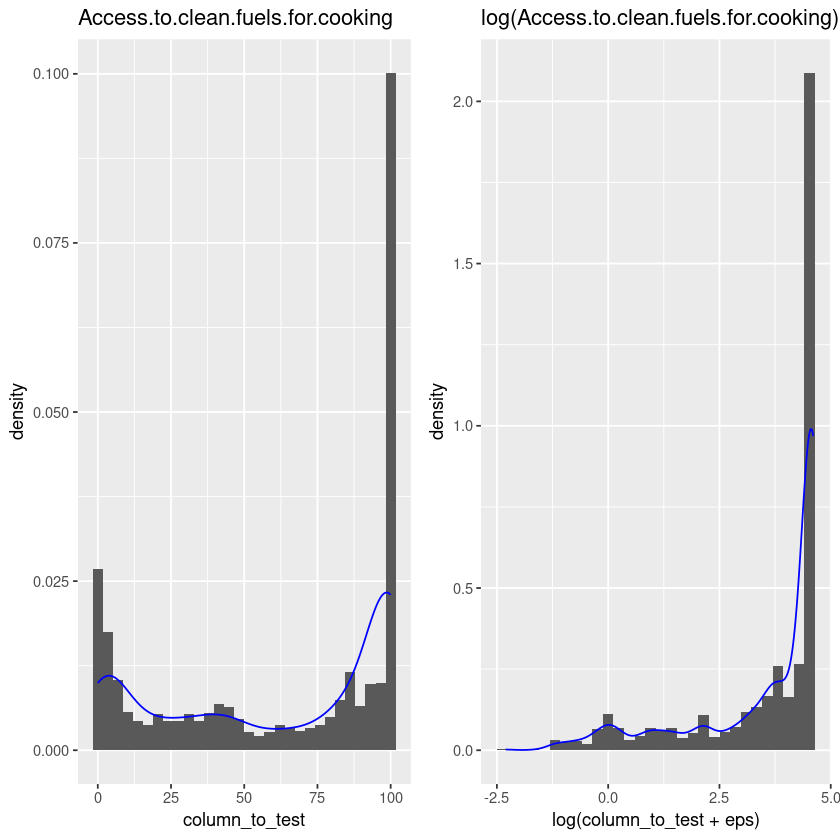

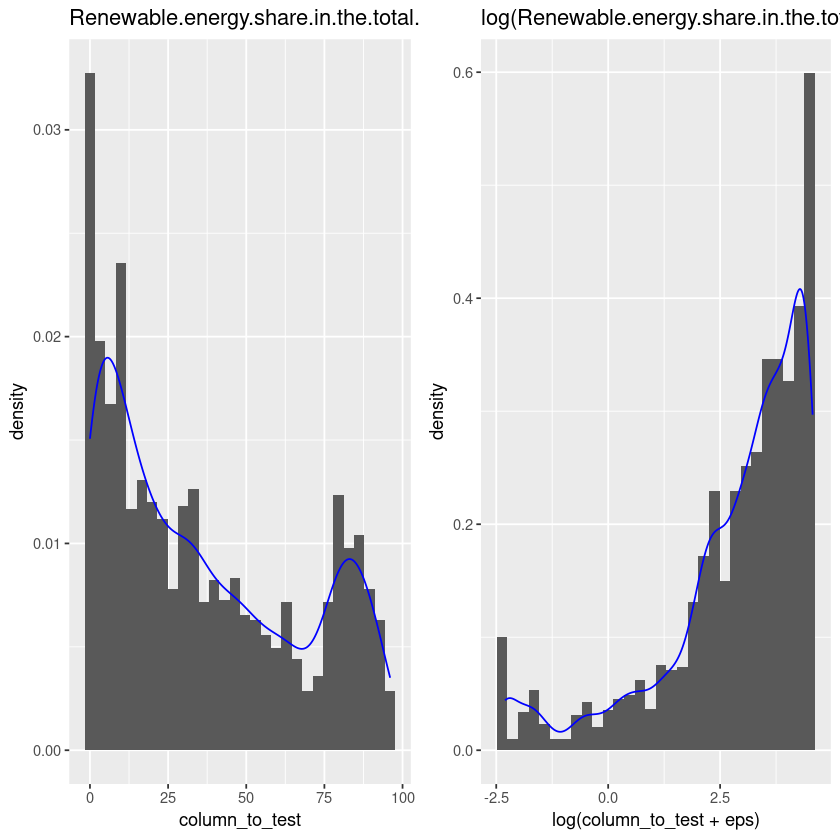

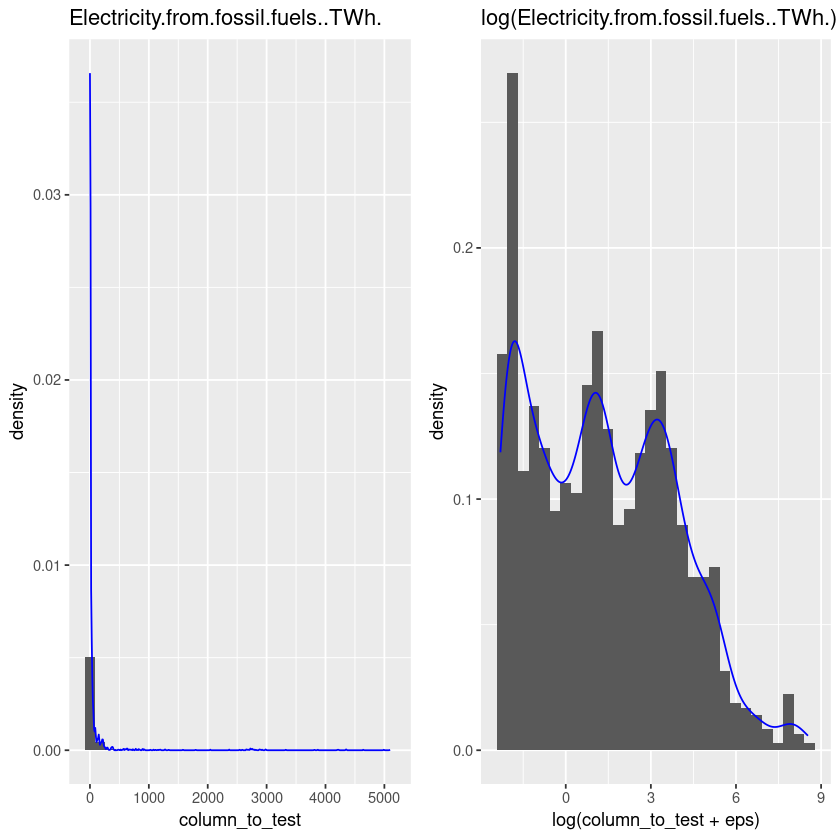

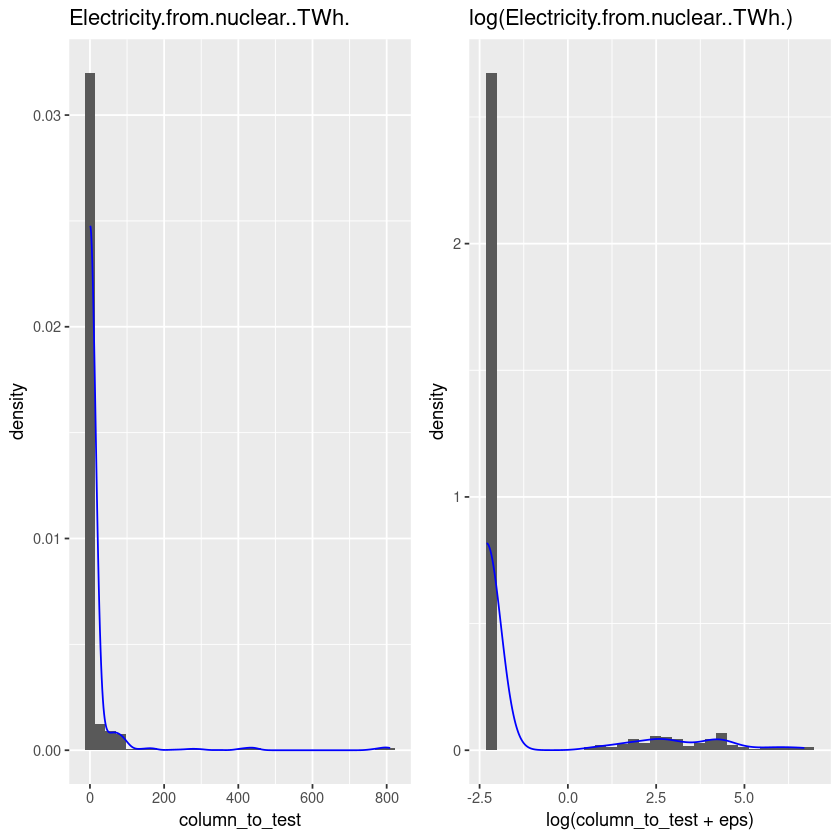

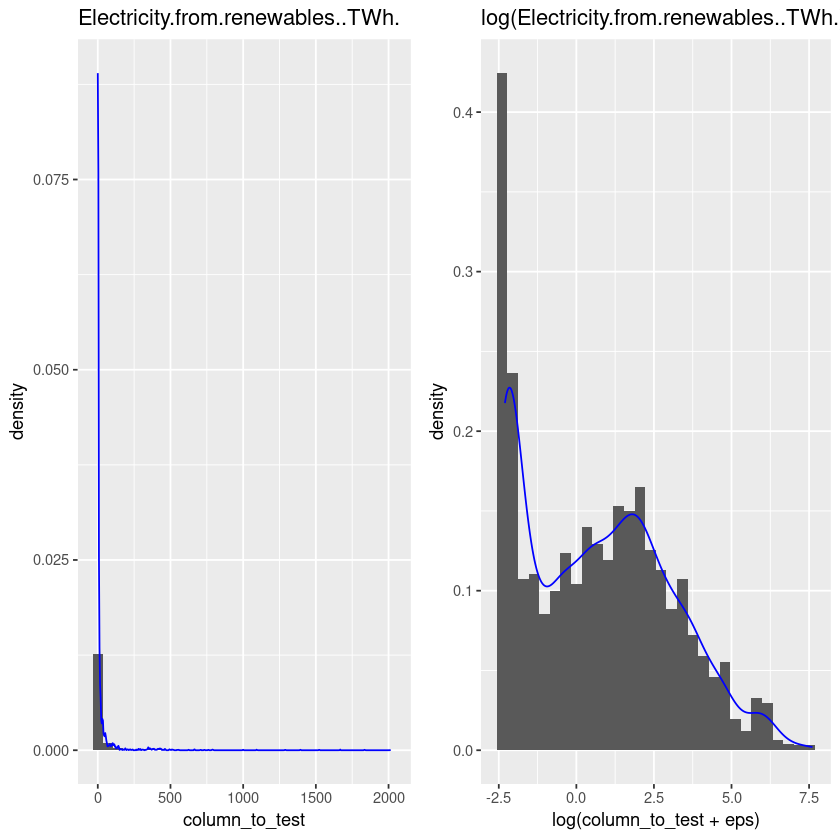

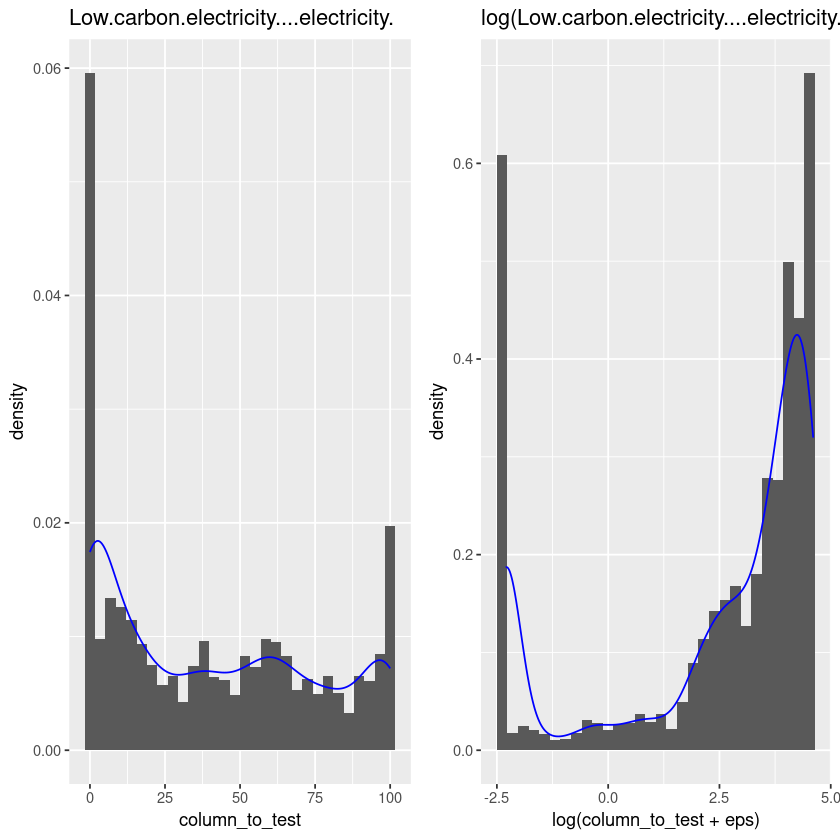

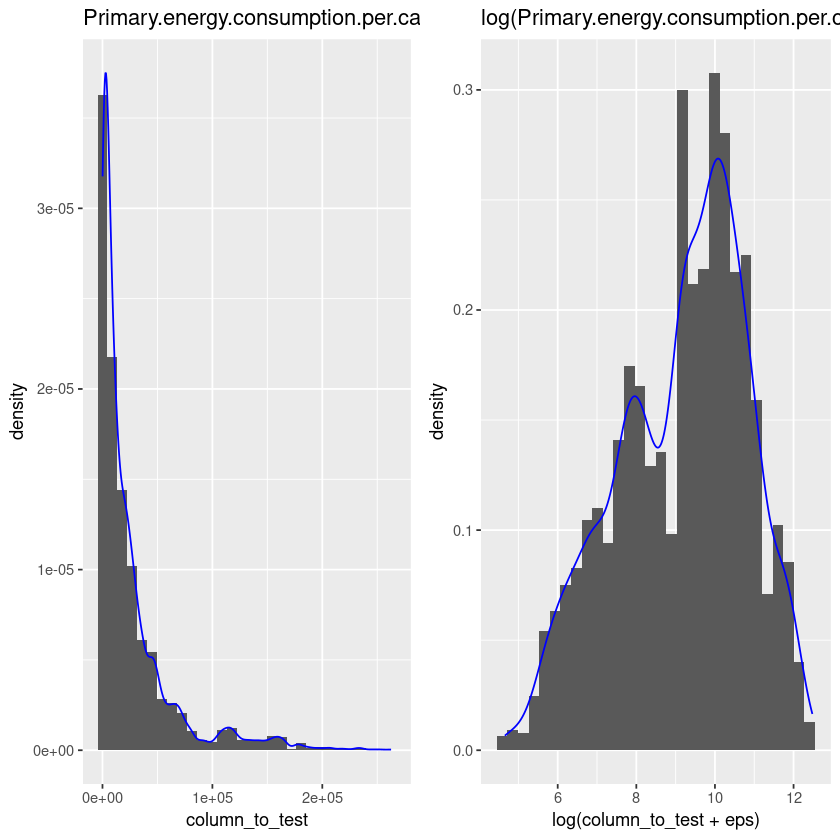

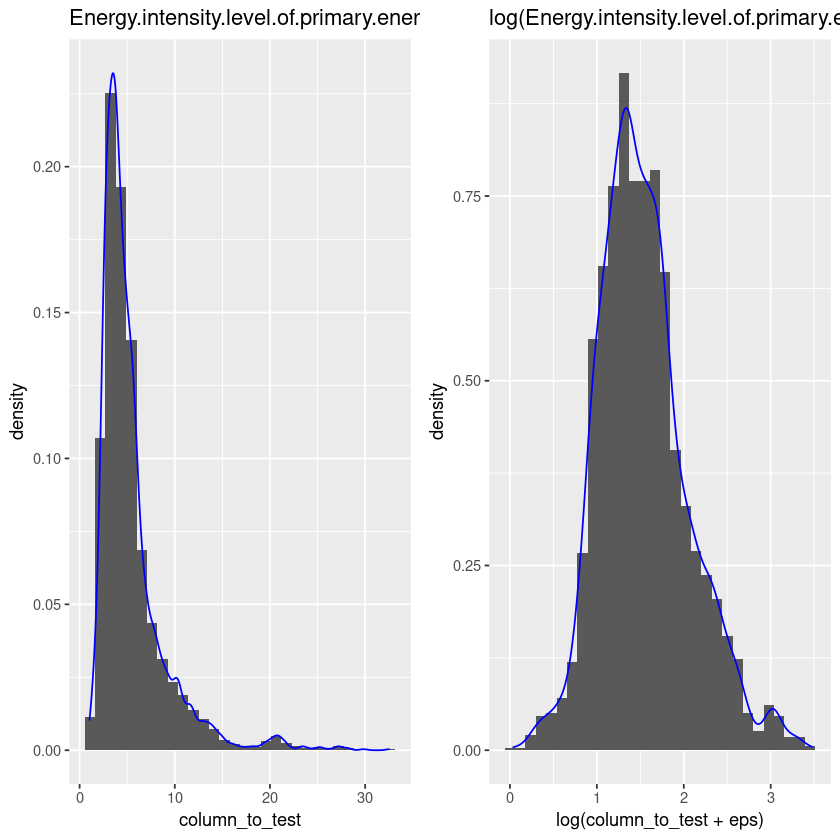

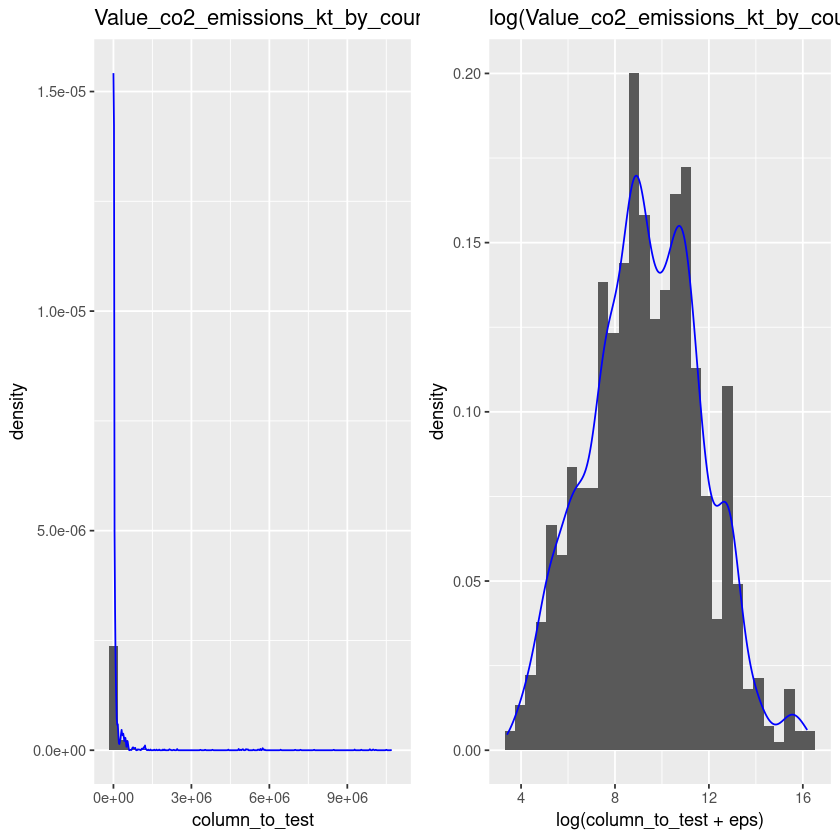

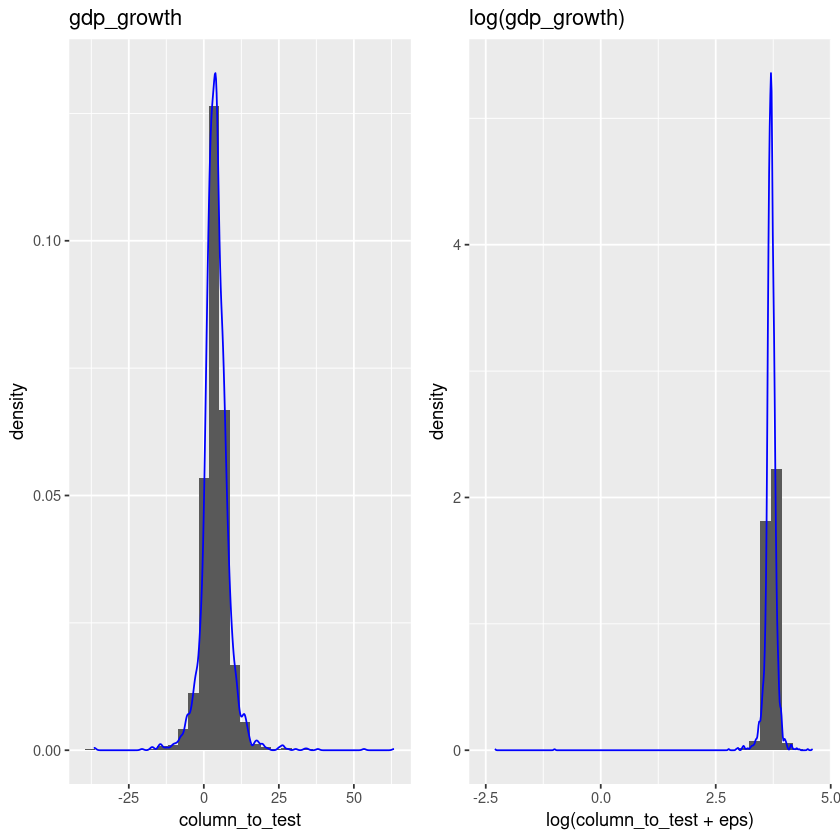

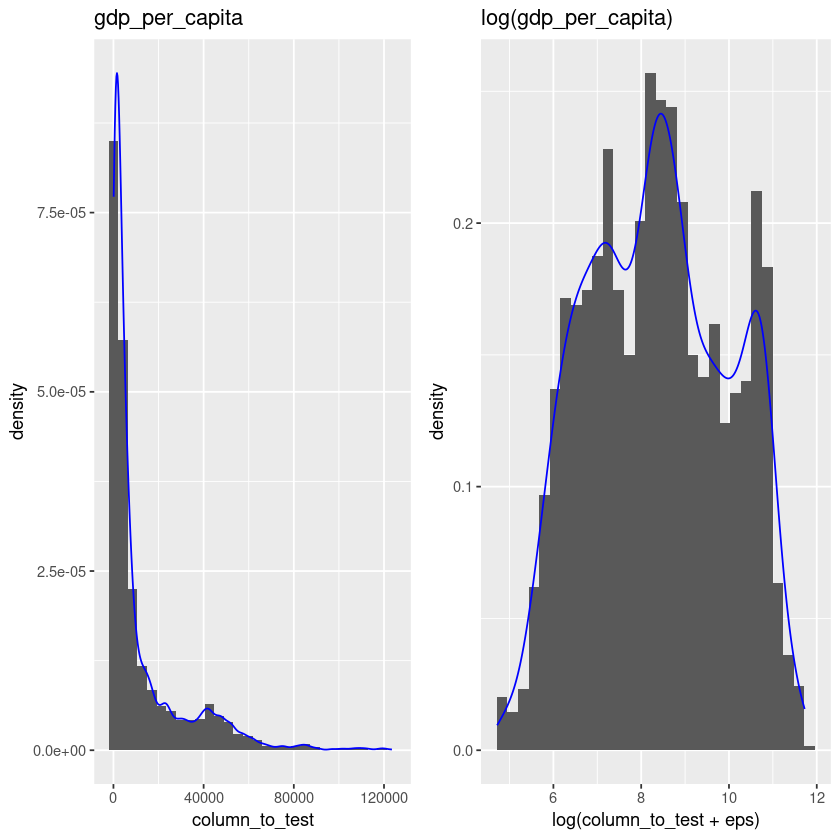

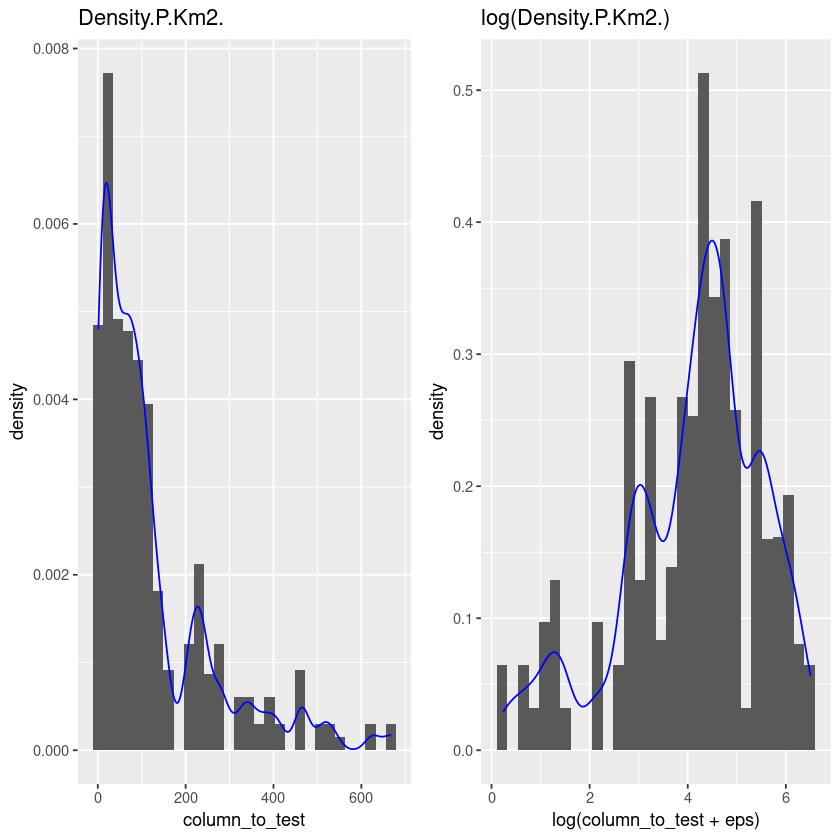

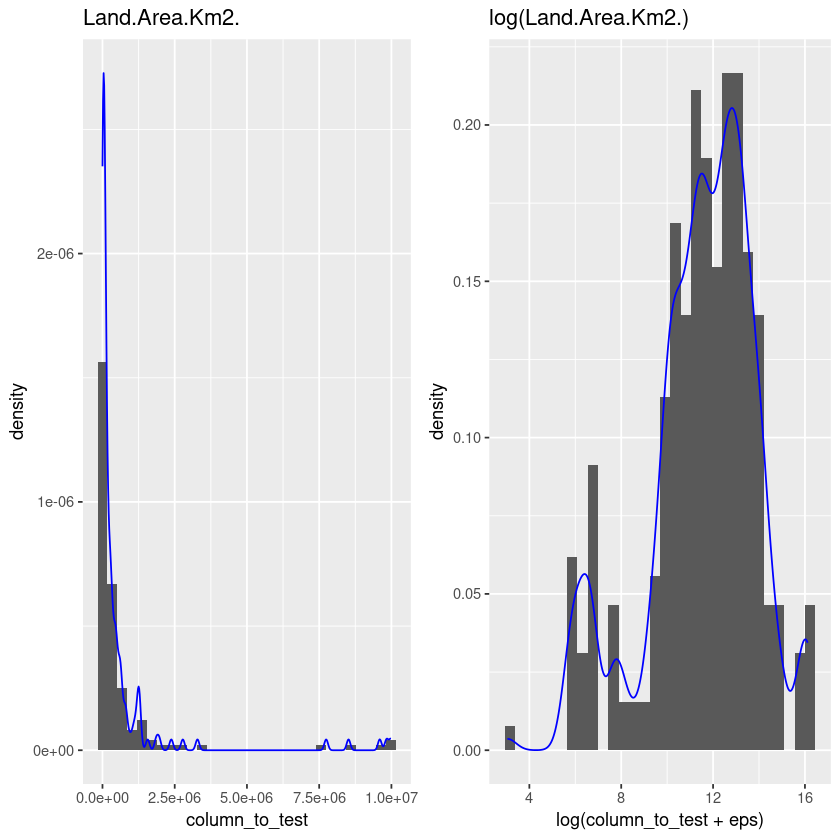

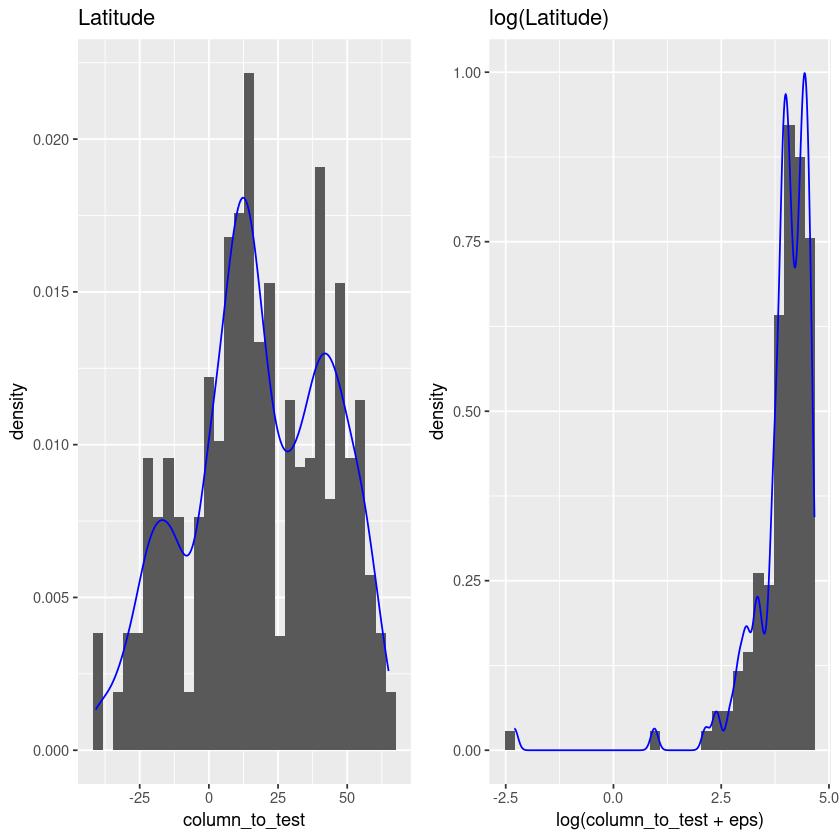

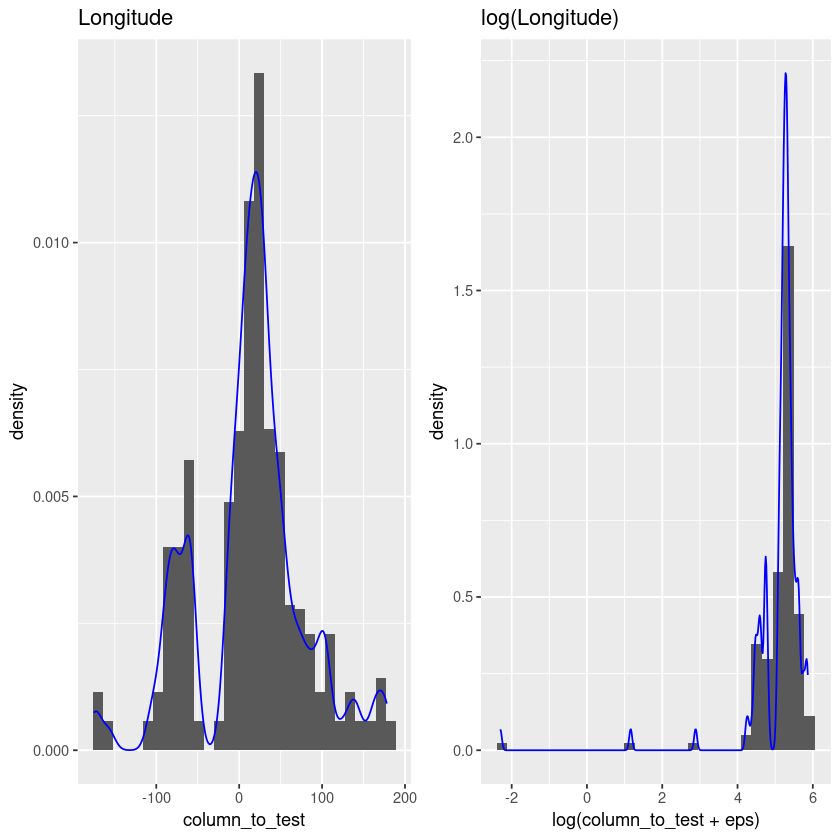

In [12]:
interesting_columns <- select(df, -c(Entity, Year))

for (i in 1:ncol(interesting_columns)){
    
  column_to_test = interesting_columns[,i]
  colname = colnames(interesting_columns)[i]
  
  eps = 0
  if (min(column_to_test)<=0){
    eps = abs(min(column_to_test)) + 0.1
  }
  
  g1<-ggplot(interesting_columns,aes(x=column_to_test))+
  geom_histogram(aes(y=after_stat(density)), bins = 30)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(colname)
  
  g2<-ggplot(interesting_columns,aes(x=log(column_to_test + eps)))+
  geom_histogram(aes(y=after_stat(density)), bins = 30)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(paste("log(",colname,")", sep=""))
  
  grid.arrange(g1, g2, ncol = 2)
  
}

Ci-dessus, nous affichons les données du dataframe ainsi que leurs transformations logarithmiques (en ajoutant un offset pour les données prenant des valeurs négatives ou nulles). On considère que la transfomation améliore nos données si la répartition de nos données transformées ressemble plus à une gaussienne. Ainsi, on peut dire que la transformation logarithmique est pertinente pour 6 colonnes que sont :

- 'Primary energy consumption per capita (kWh/person)'
- 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
- 'Value_co2_emissions_kt_by_country'
- 'gdp_per_capita'
- 'Density(P/Km2)'
- 'Land Area(Km2)'.

On décide de créer de nouvelles colonnes à notre dataframe pour sauvegarder nos transformations log. Par exemple pour la variable 'gdp_per_capita', nous avons la colonne d'origine et nous crééons 'log_gdp_per_capita' qui comporte le log de 'gdp_per_capita'.

In [13]:
df <- df %>% mutate(log_Primary.energy.consumption.per.capita..kWh.person. = log(Primary.energy.consumption.per.capita..kWh.person.),
                    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.),
                    log_gdp_per_capita = log(gdp_per_capita),
                    log_Value_co2_emissions_kt_by_country = log(Value_co2_emissions_kt_by_country),
                    log_Density.P.Km2. = log(Density.P.Km2.),
                    log_Land.Area.Km2. = log(Land.Area.Km2.))

head(df)

Entity      Year Access.to.electricity....of.population.
4 Afghanistan 2003 14.73851                               
5 Afghanistan 2004 20.06497                               
6 Afghanistan 2005 25.39089                               
7 Afghanistan 2006 30.71869                               
8 Afghanistan 2007 36.05101                               
9 Afghanistan 2008 42.40000                               
  Access.to.clean.fuels.for.cooking
4  9.50                            
5 10.90                            
6 12.20                            
7 13.85                            
8 15.30                            
9 16.70                            
  Renewable.energy.share.in.the.total.final.energy.consumption....
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
7 31.89                                                           
8 28.78                                                           
9 21.17                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
7 0.20                                0                             
8 0.20                                0                             
9 0.19                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
7 0.64                              76.19048                              
8 0.75                              78.94737                              
9 0.54                              73.97260                              
  Primary.energy.consumption.per.capita..kWh.person. ⋯ Density.P.Km2.
4 229.9682                                           ⋯ 60            
5 204.2312                                           ⋯ 60            
6 252.0691                                           ⋯ 60            
7 304.4209                                           ⋯ 60            
8 354.2799                                           ⋯ 60            
9 607.8335                                           ⋯ 60            
  Land.Area.Km2. Latitude Longitude
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995 
7 652230         33.93911 67.70995 
8 652230         33.93911 67.70995 
9 652230         33.93911 67.70995 
  log_Primary.energy.consumption.per.capita..kWh.person.
4 5.437941                                              
5 5.319253                                              
6 5.529703                                              
7 5.718411                                              
8 5.870087                                              
9 6.409901                                              
  log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
4 0.3364722                                                      
5 0.1823216                                                      
6 0.3435897                                                      
7 0.4054651                                                      
8 0.4252677                                                      
9 0.6626880                                                      
  log_gdp_per_capita log_Value_co2_emissions_kt_by_country log_Density.P.Km2.
4 5.250617           7.106606                              4.094345          
5 5.353667           6.937314                              4.094345          
6 5.489067           7.

5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. Quels sont les 5 pays les plus
émetteurs de CO2 ?

On s'intéresse désormais à la variable 'Value_co2_emissions_kt_by_country'.

On commence par trier les valeurs des émissions pour chaque pays et on affiche un barplot des 50 pays les plus émetteurs. On voit qu'il y a 5 pays qui comportent une valeur d'émissions supérieure à 1.5e7, puis les valeurs des autres pays sont beaucoup plus faibles.

On renvoie ensuite les valeurs des émissions de C02 pour les différents pays puis on affiche le barplot avec les 5 pays les plus émetteurs.

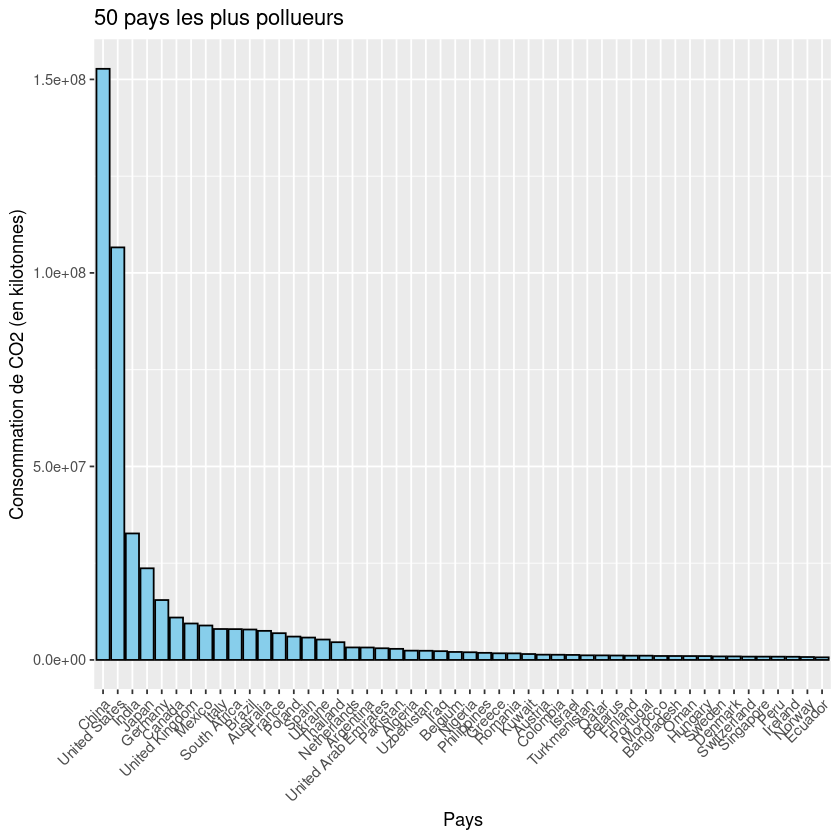

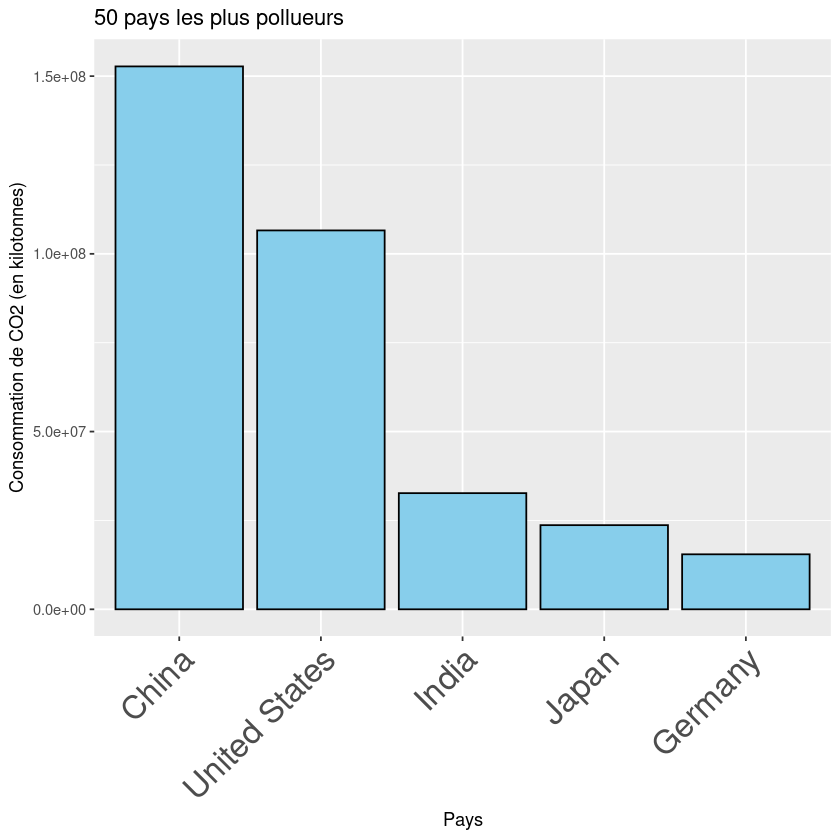

In [14]:
emissions_par_pays <- df %>% select(Entity,Value_co2_emissions_kt_by_country)

emissions_par_pays <- emissions_par_pays %>% ## on regroupe les pays en sommant leur consommation de co2
  group_by(Entity) %>%
  summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

emissions_par_pays<- emissions_par_pays %>% arrange(desc(Value_co2_emissions_kt_by_country)) ## on classe par ordre décroissant

#emissions_par_pays <- distinct(emissions_par_pays,Entity)
# On sélectionne les 50 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:50)

ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))


## On sélectionne les 5 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:5)
ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 20))

6. Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations... Analysez les dépendances entre
les variables quantitatives

Afin de poursuivre notre étude, on analyse le point de vue descriptif multidimensionnel, on commence par afficher la matrice de corrélation entre les différentes variables.

Cet affichage nous permet de voir qu'il existe une corrélation très importante (proche de 1 : 0.99) entre la variable à prédire 'Value_co2_emissions_kt_by_country' et 'Electricity from fossil fuels (TWh)'. De plus, on peut aussi noter une corrélation conséquente entre ''Value_co2_emissions_kt_by_country' et 'Electricity from renewables (TWh)'.

On peut aussi conclure des liens moins important entre 'log_Value_co2_emissions_kt_by_country' et 'Land Area(Km2)', 'Access to clean fuels for cooking', et 'log_Primary energy consumption per capita (kWh/person)'.

(Le graphique suivant est plus lisible sur le notebook Python)

In [15]:
library(corrplot)

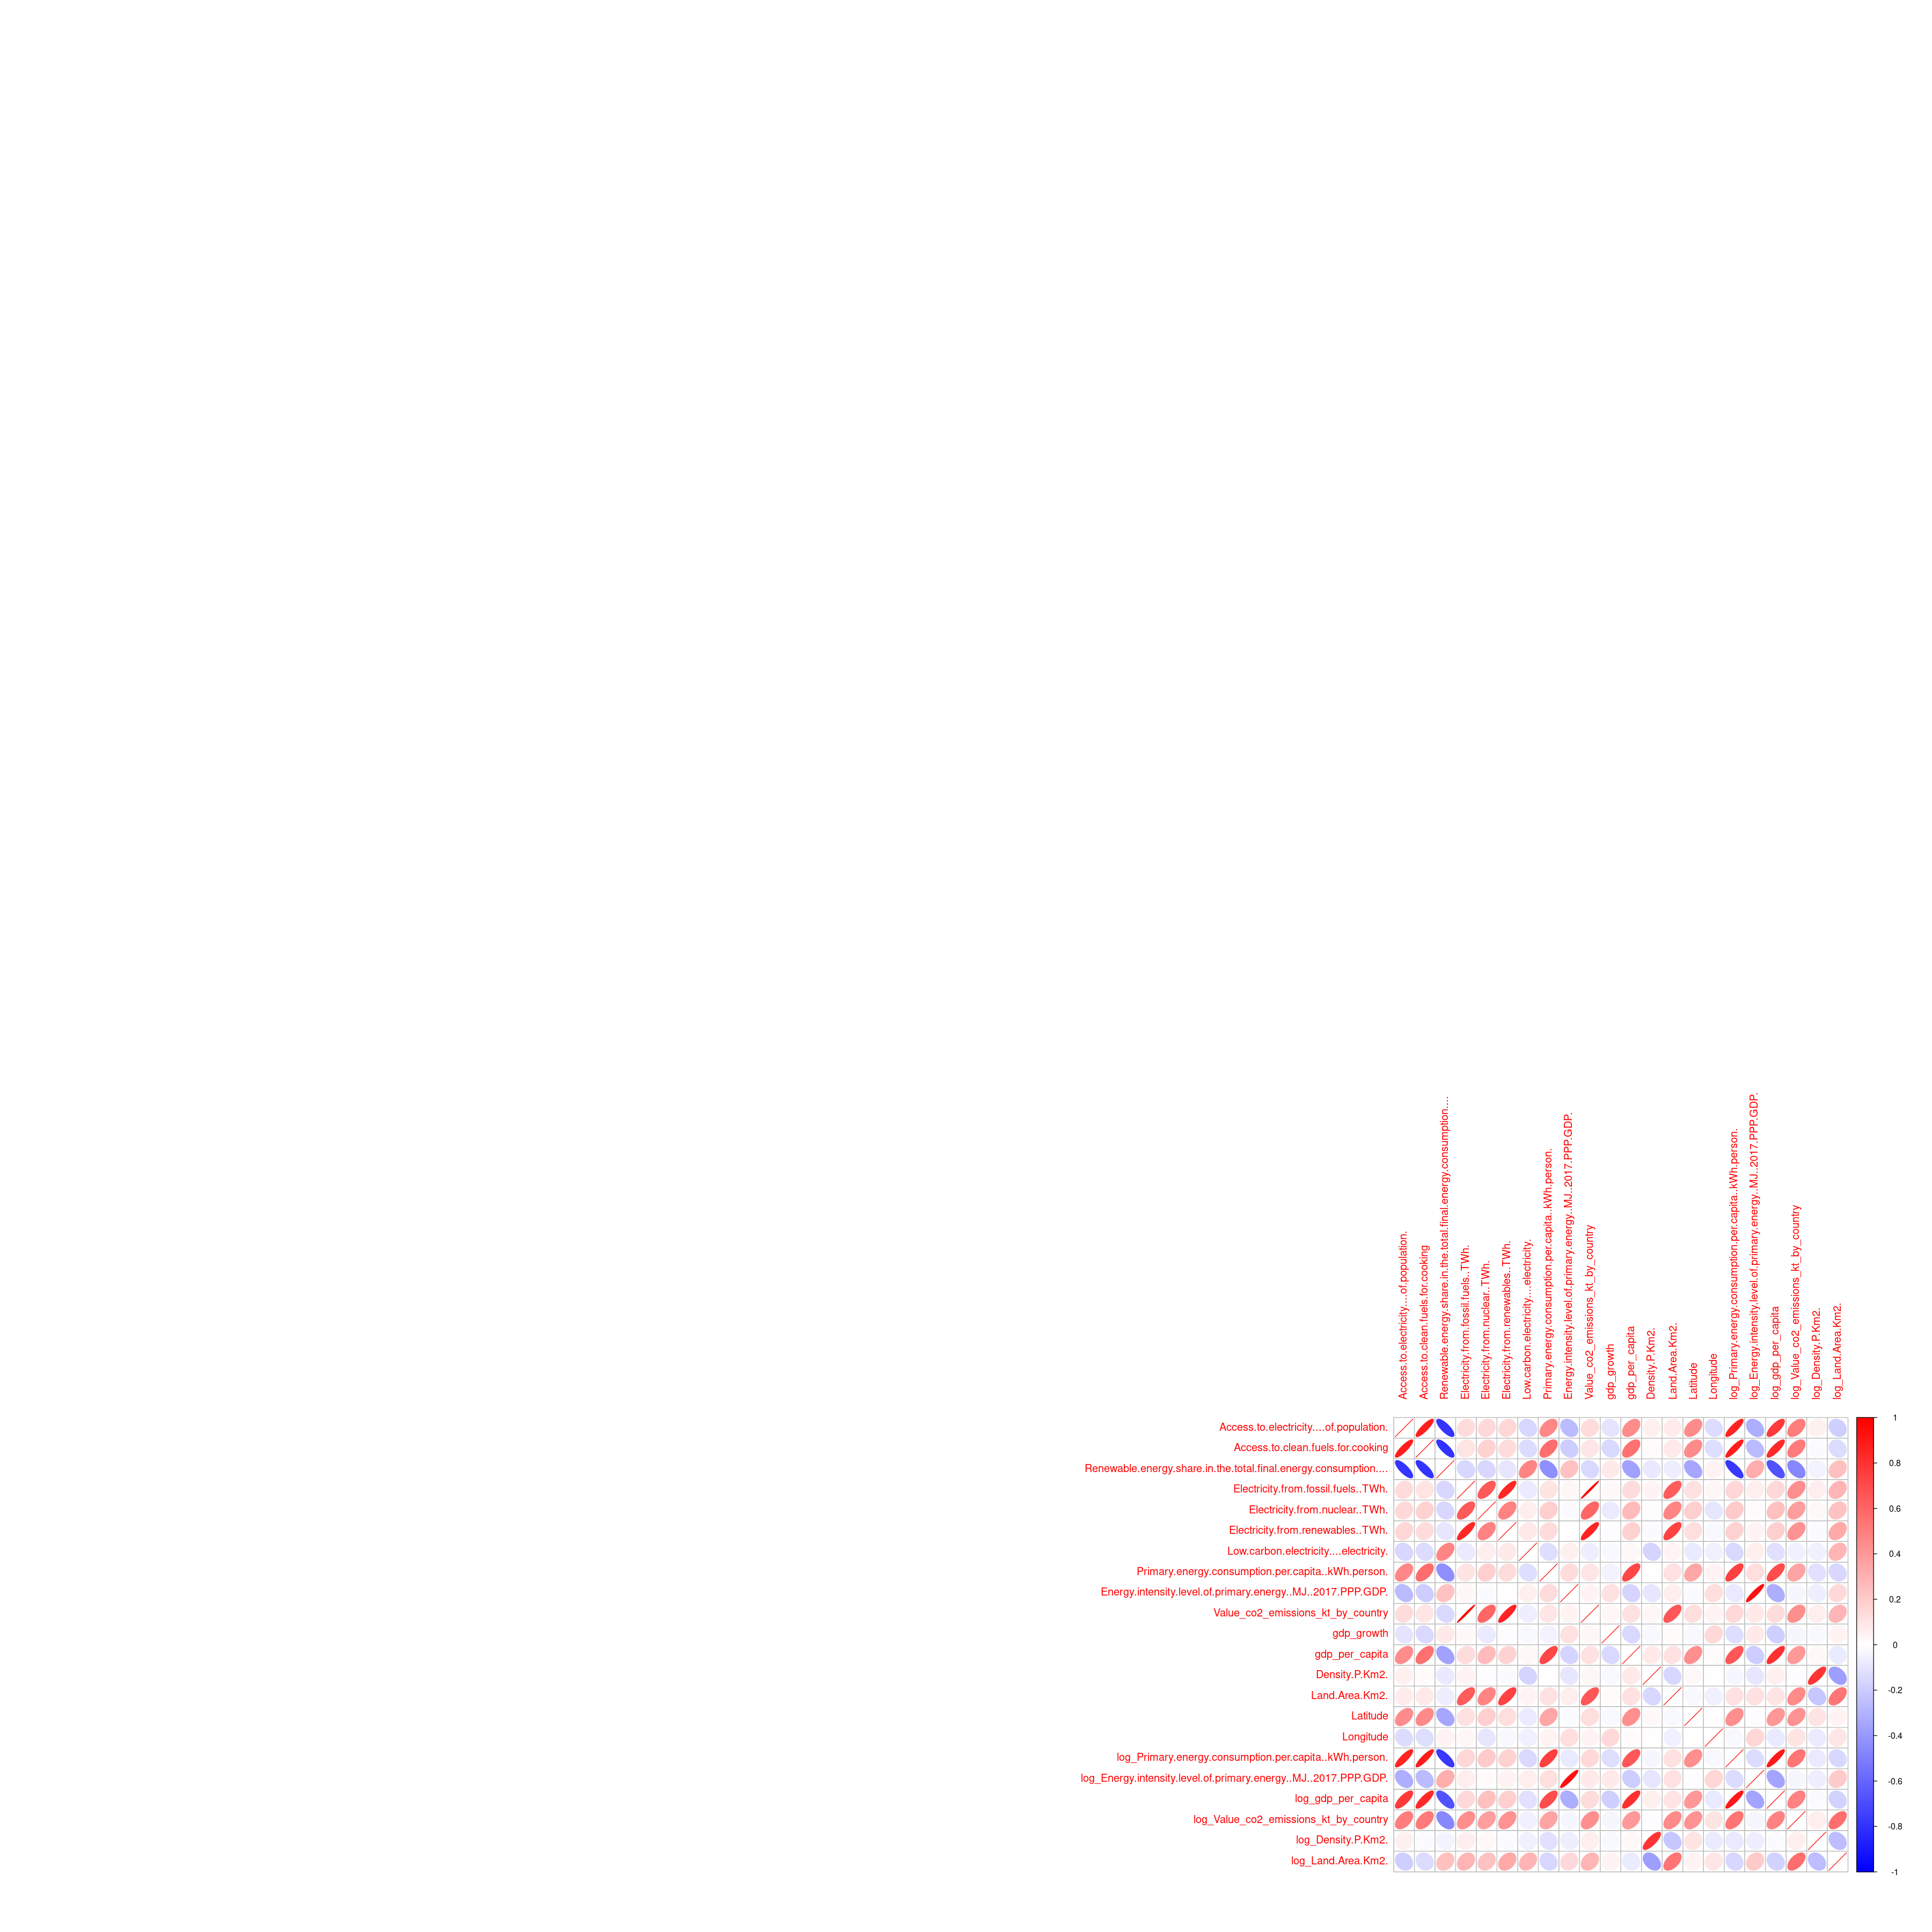

In [16]:
options(repr.plot.width=30, repr.plot.height=30)

coolwarm <- colorRampPalette(c("blue", "white", "red"))(200)
cor_matrix <- cor(select(df, -c(1,2))) 

corrplot(cor_matrix,
        method = "ellipse",
        col = coolwarm,
        tl.cex = 1)

On affiche également le nuage point des différentes variables. Dû au grand nombre de variables, l'analyse de ce graphique reste compliquée.

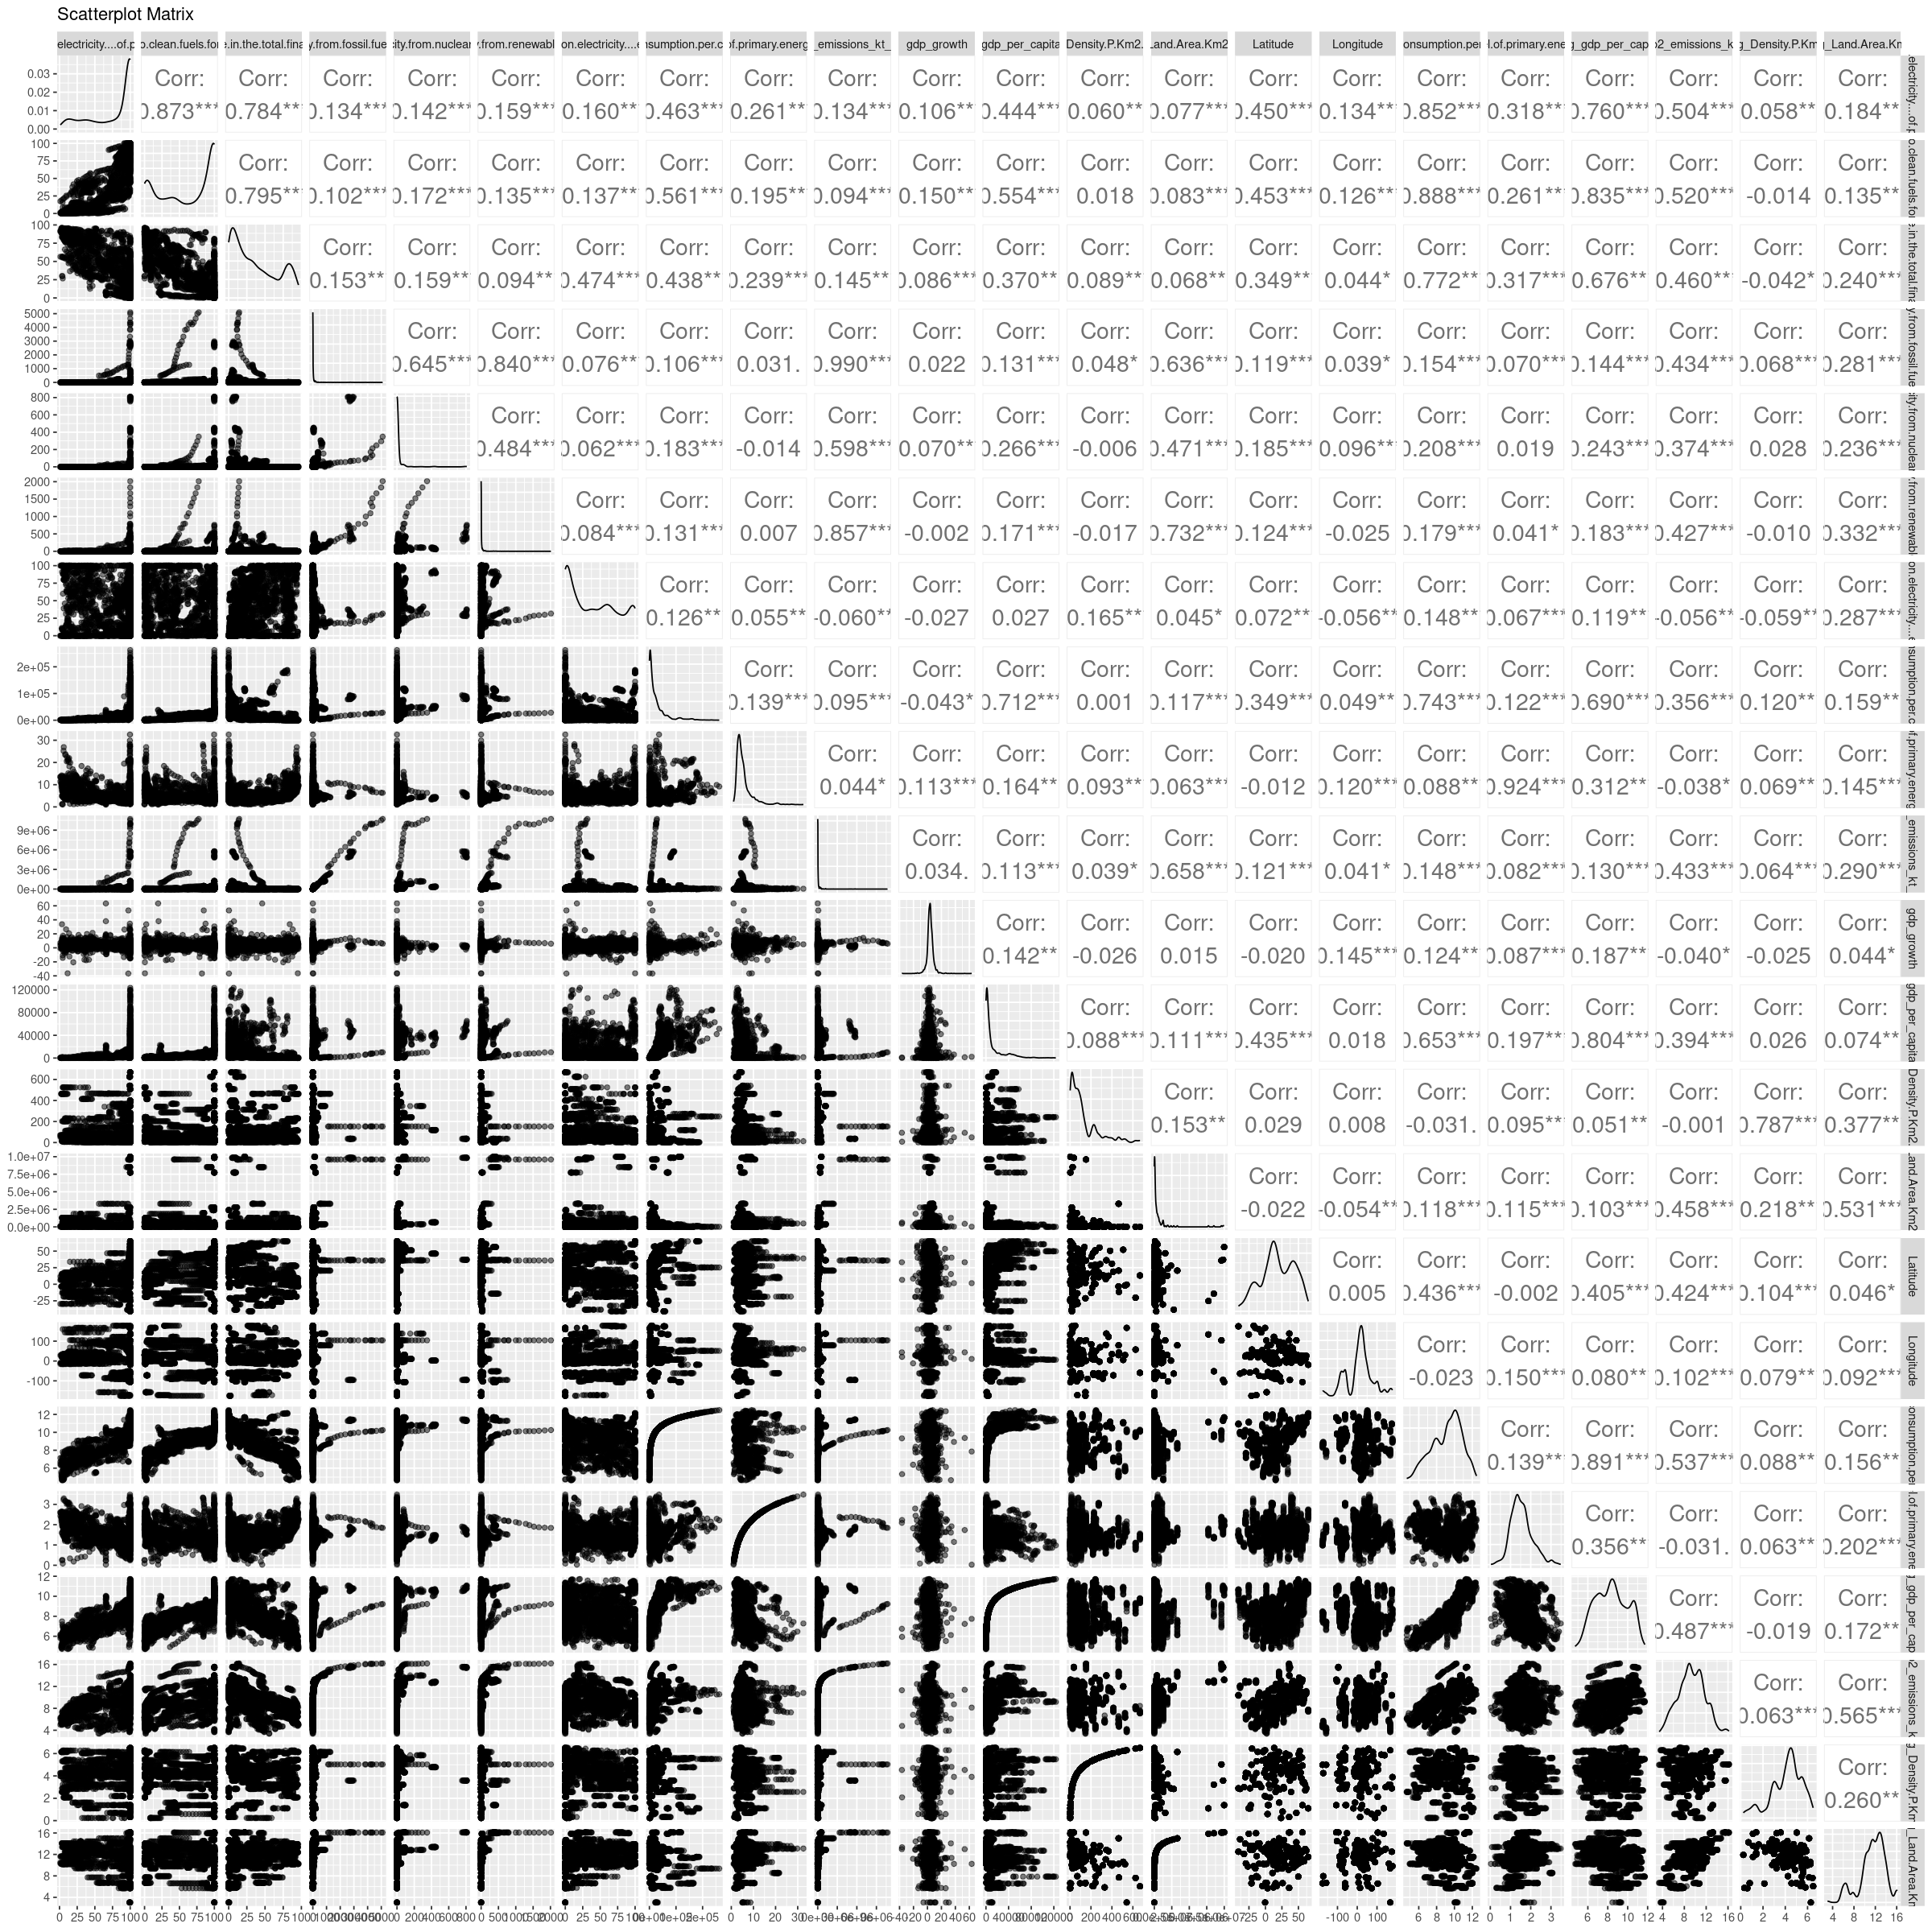

In [17]:
library(GGally)
data <- select(df, -c(1,2))

# Créer la scatterplot matrix
options(repr.plot.width=20, repr.plot.height=20)
ggpairs(data,
        upper = list(continuous = wrap("cor", size = 6)),
        lower = list(continuous = wrap("points", alpha = 0.5)),
        diag = list(continuous = wrap("densityDiag")),
        title = "Scatterplot Matrix")

7. Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats

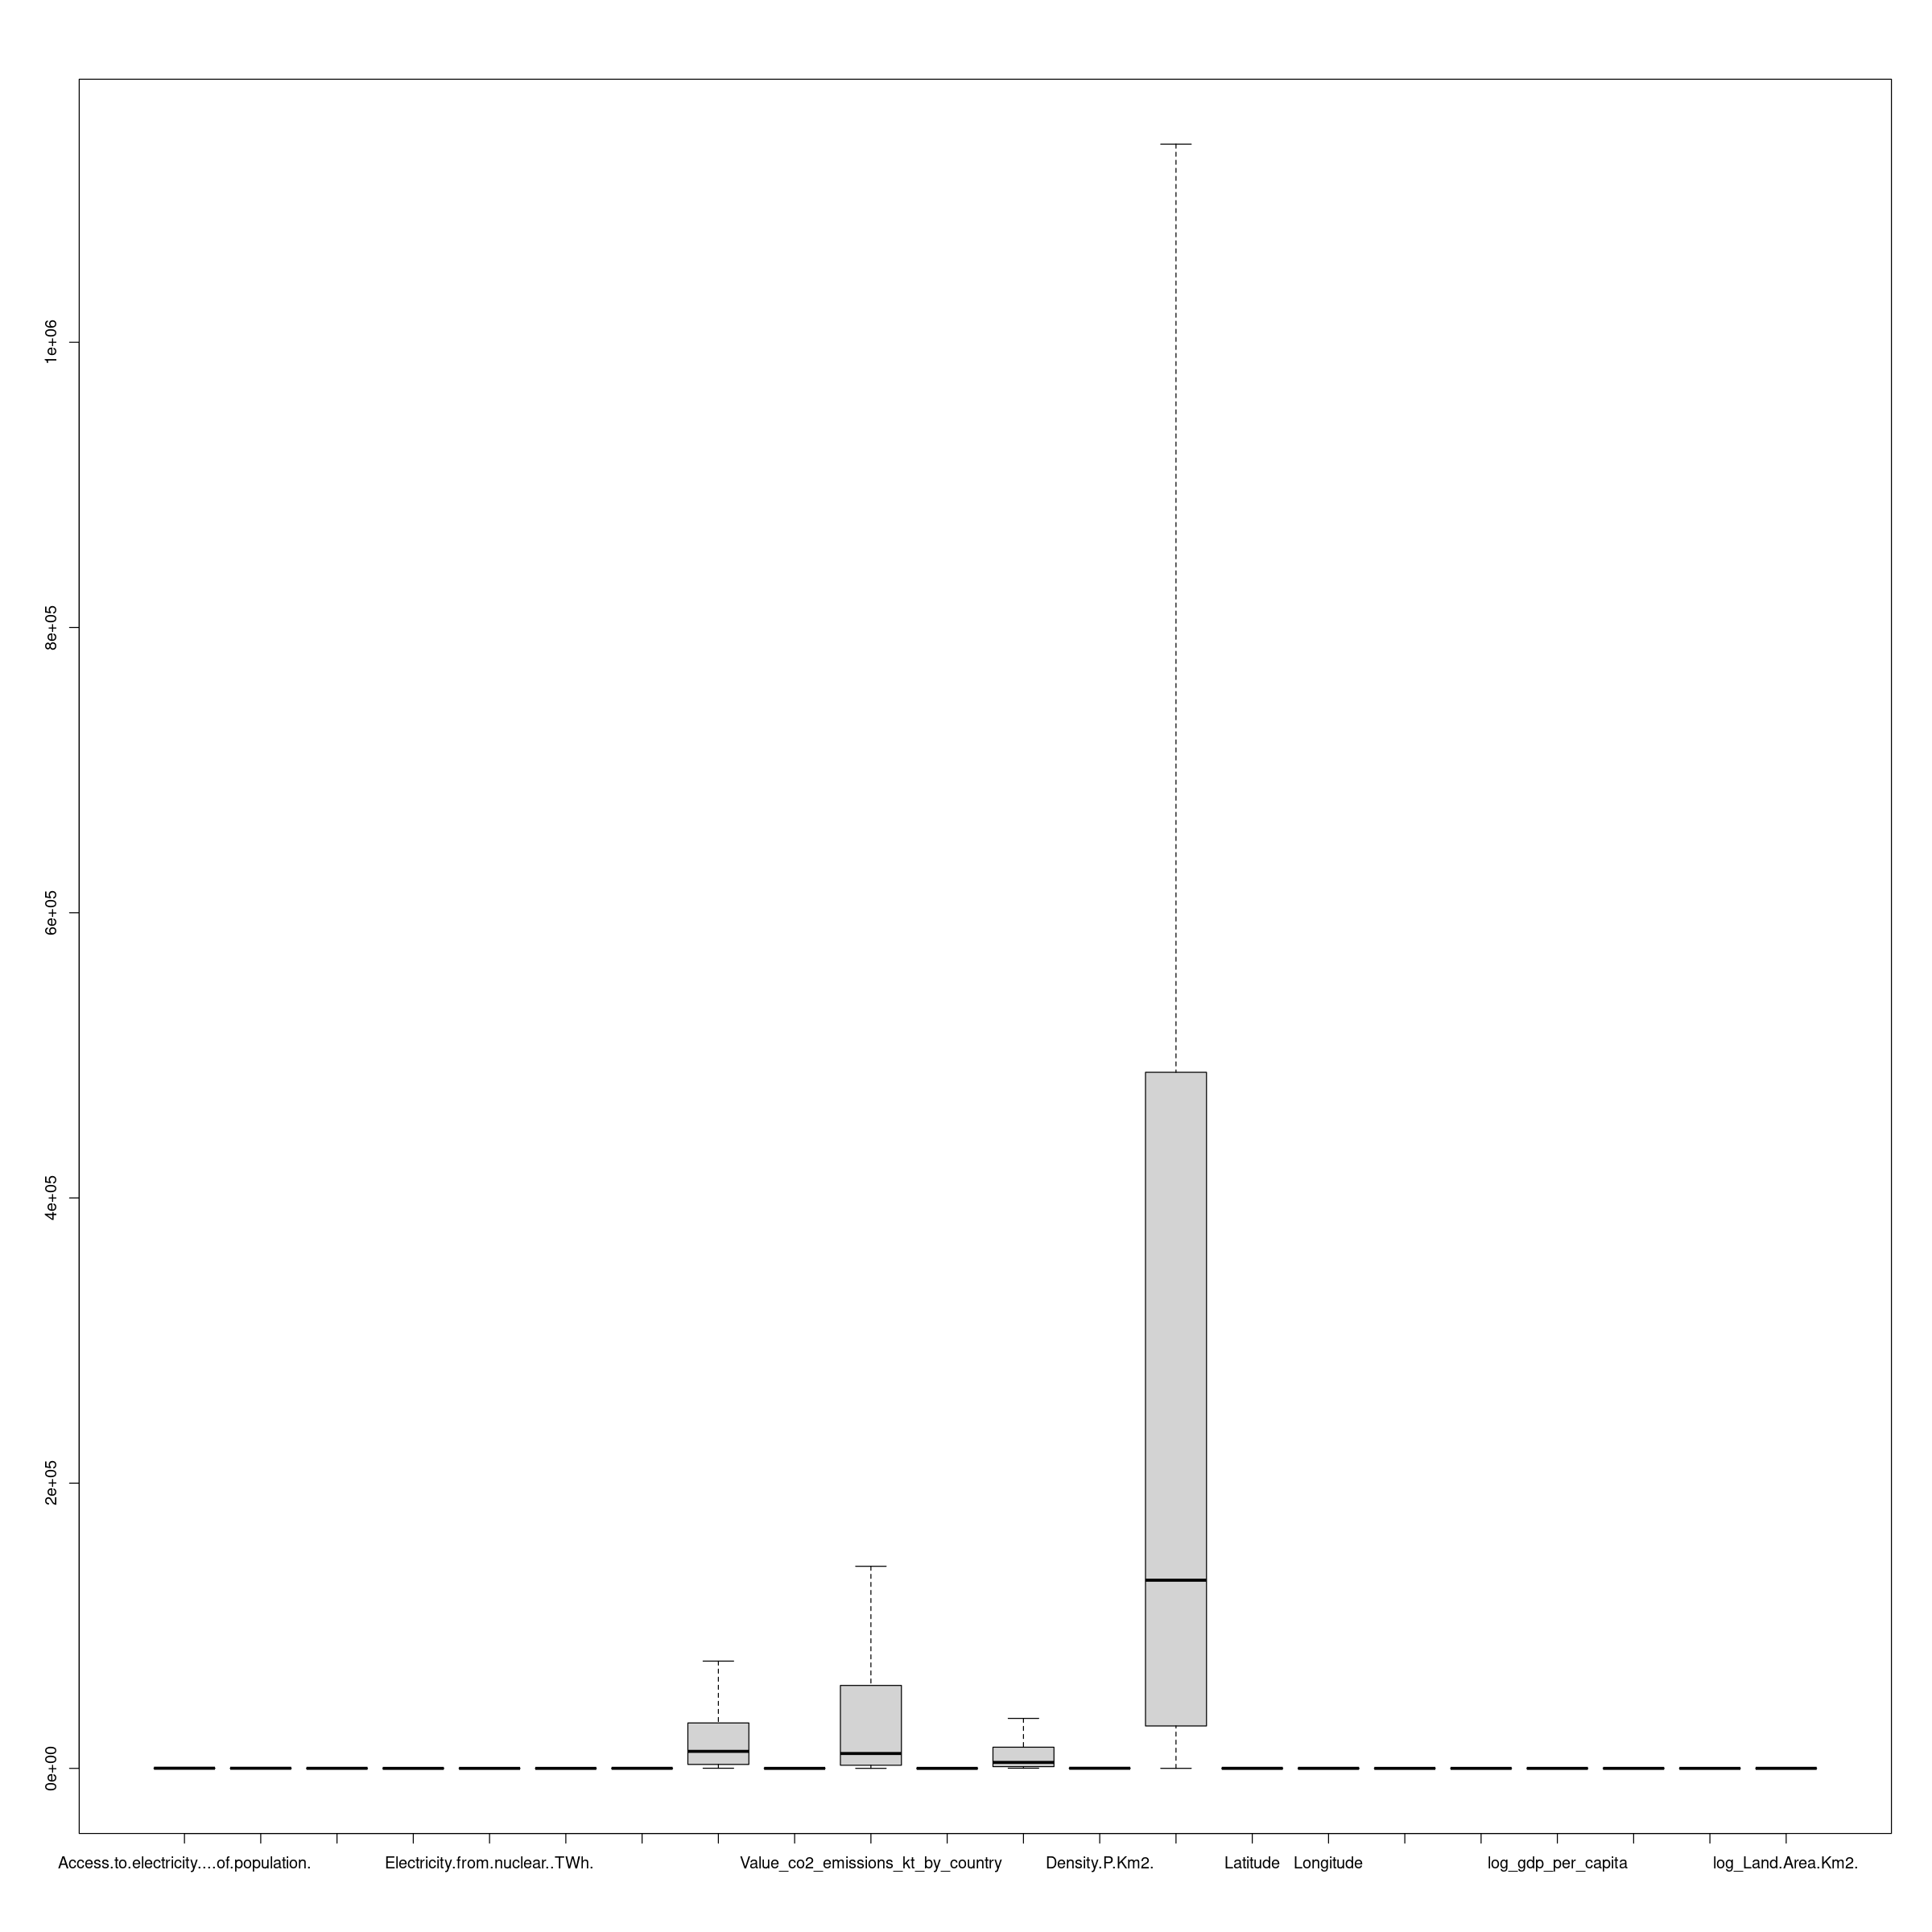

In [18]:
data <- select(df, -c(1,2))
options(repr.plot.width=20, repr.plot.height=20)
boxplot(data, outline=FALSE)

On peut voir que les variables n'ont pas des données de même échelle donc il est nécessaire de normaliser les données avant de continuer la suite

In [19]:
df_norm <- data.frame(scale(select(df, -c(Entity, Year)))) #Standardisation des données

In [20]:
library(FactoMineR)

Suite à la standardisation des données, on réalise l'ACP.

In [21]:
df_pca <- PCA(df_norm)
print(df_pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 2868 individuals, described by 22 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error

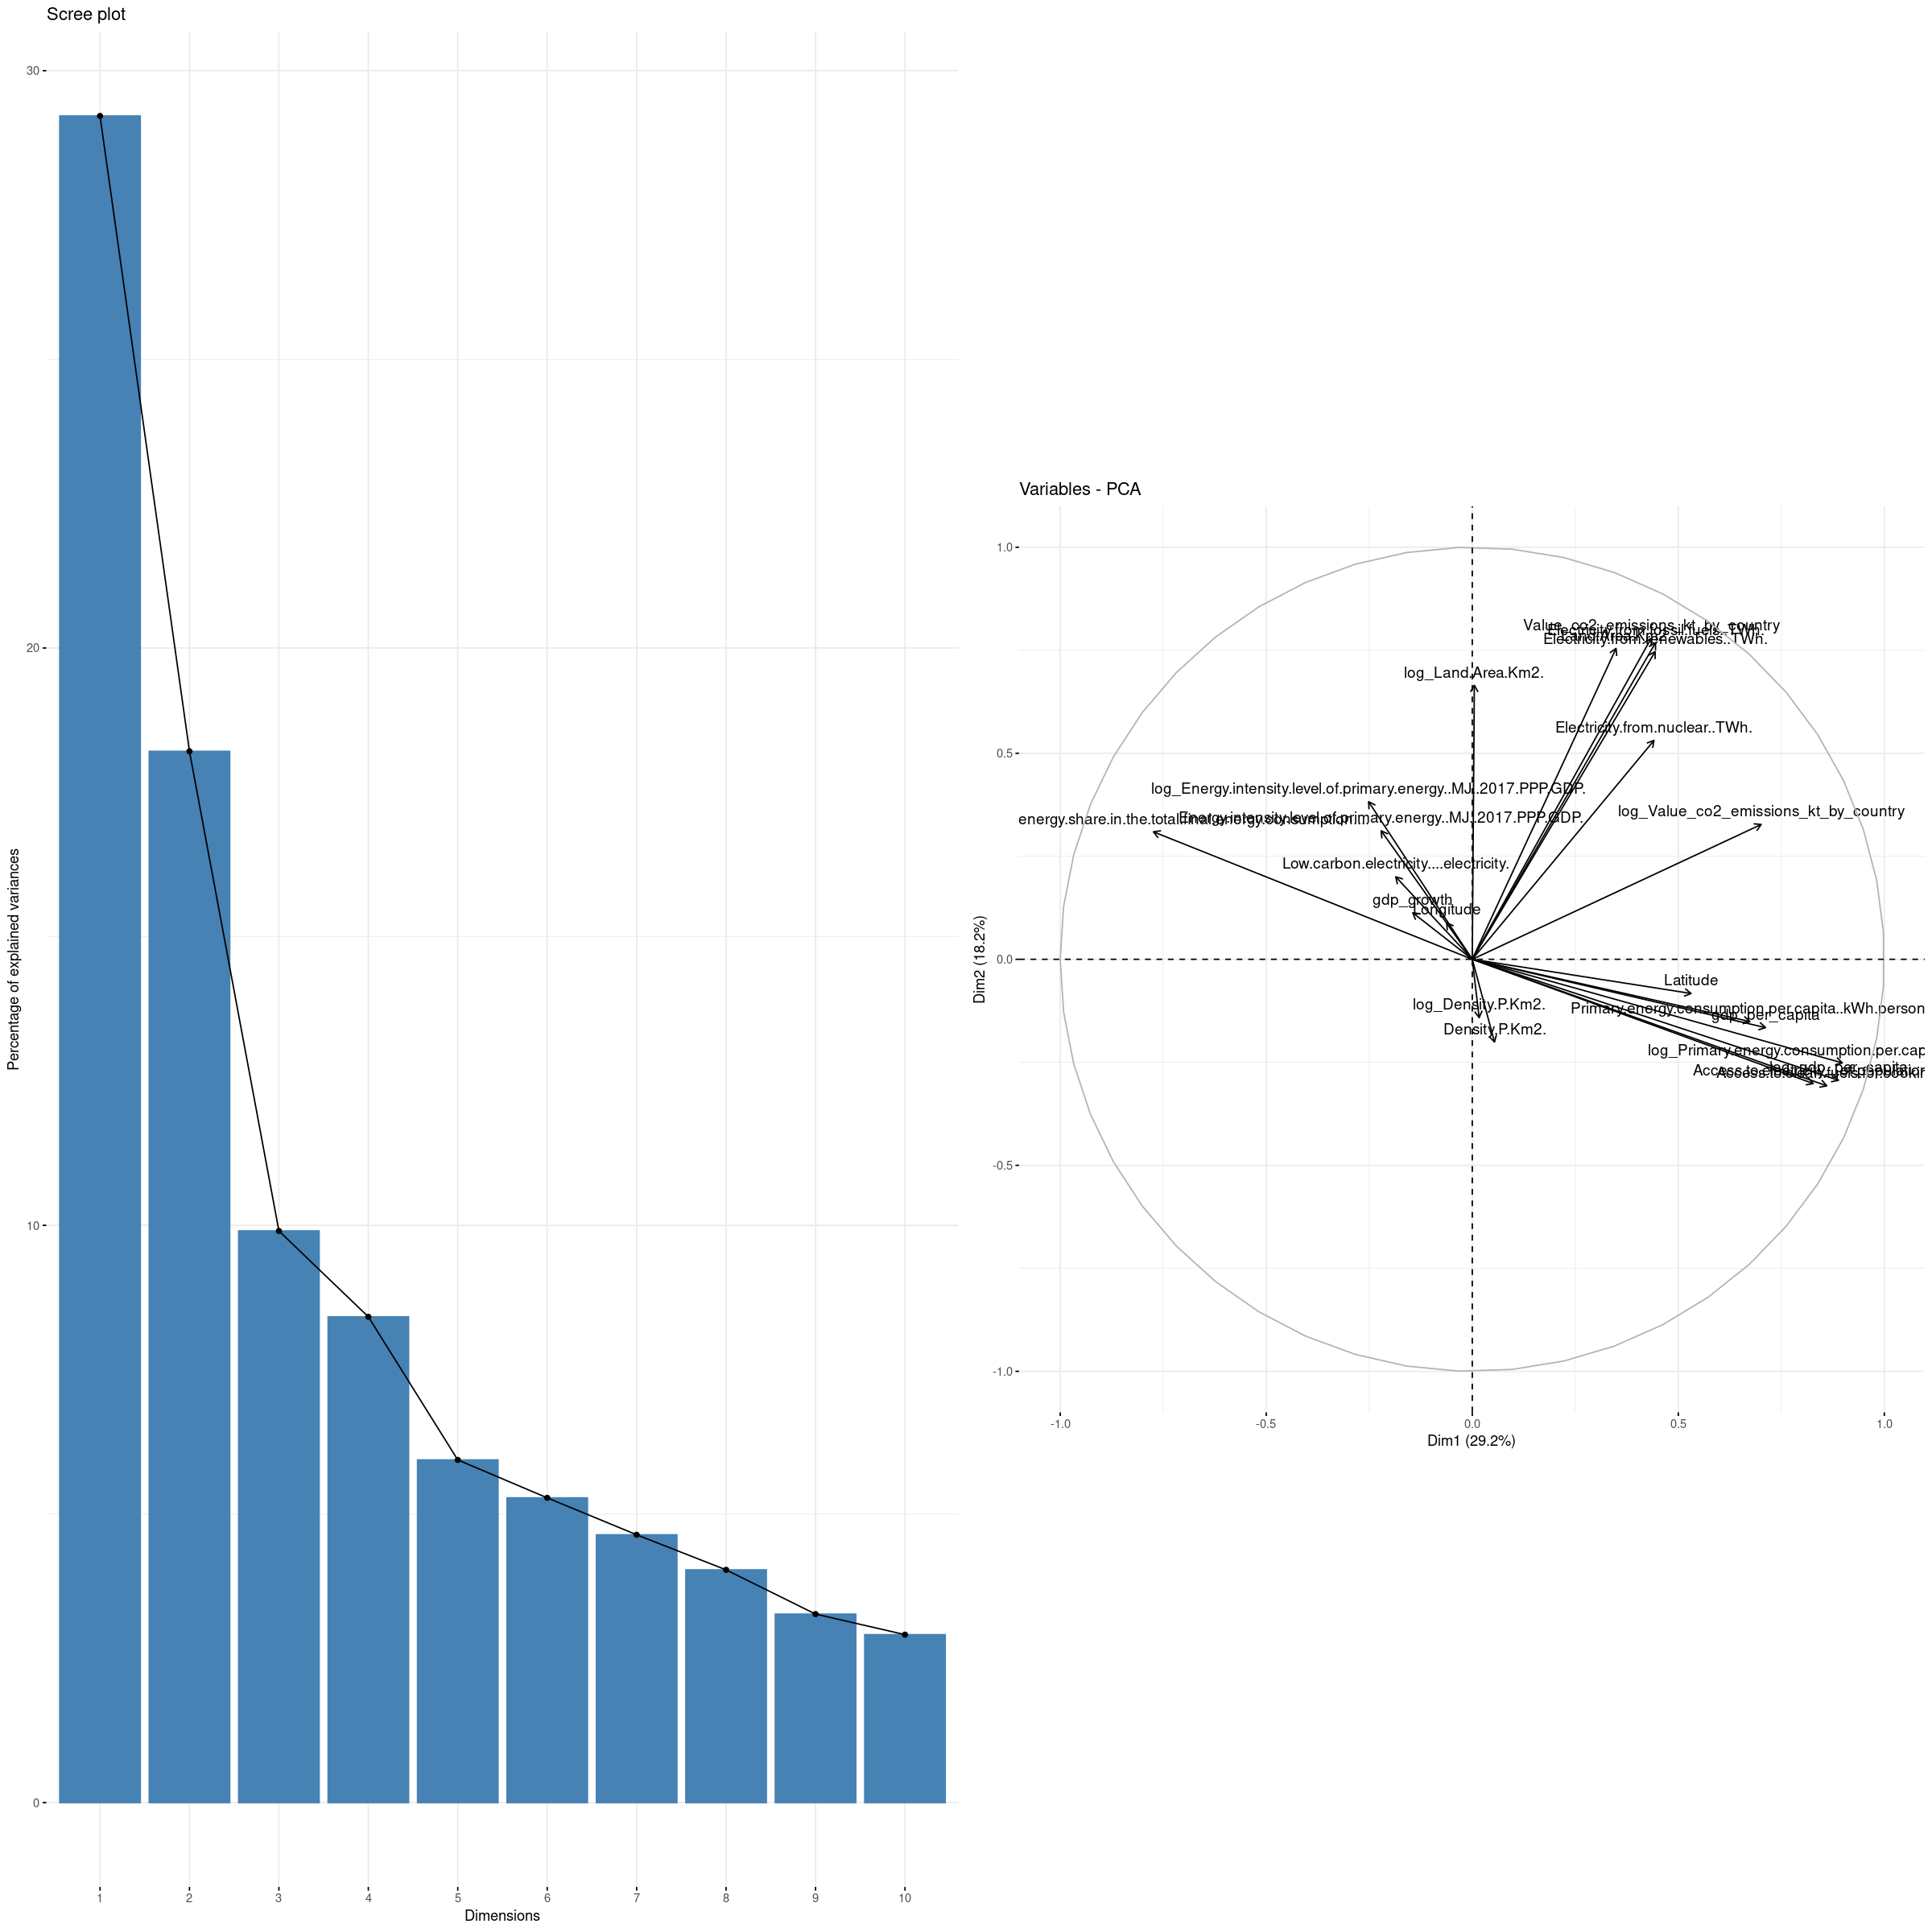

In [22]:
grid.arrange(
    fviz_eig(df_pca), 
    fviz_pca_var(df_pca,axes=c(1,2)),
    ncol=2
)

On visualise ici la courbe de la Variance cumulée : plus il y a de composantes, mieux la variance est expliquée.

Comme les noms de variables se superposent, on affiche la matrice des contributions de l'acp, afin de vérifier quelles variables sont corrélées avec la variable à expliquer.

In [23]:
df_pca$var$coord

Dim.1       
Access.to.electricity....of.population.                           0.827489552
Access.to.clean.fuels.for.cooking                                 0.860230106
Renewable.energy.share.in.the.total.final.energy.consumption.... -0.773712223
Electricity.from.fossil.fuels..TWh.                               0.444752087
Electricity.from.nuclear..TWh.                                    0.440922303
Electricity.from.renewables..TWh.                                 0.443886841
Low.carbon.electricity....electricity.                           -0.185756055
Primary.energy.consumption.per.capita..kWh.person.                0.673863196
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      -0.221116315
Value_co2_emissions_kt_by_country                                 0.433877434
gdp_growth                                                       -0.144466197
gdp_per_capita                                                    0.711681322
Density.P.Km2.                                                    0.053963287
Land.Area.Km2.                                                    0.348908997
Latitude                                                          0.530996254
Longitude                                                        -0.062221482
log_Primary.energy.consumption.per.capita..kWh.person.            0.897987011
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.  -0.251637519
log_gdp_per_capita                                                0.888639544
log_Value_co2_emissions_kt_by_country                             0.701172830
log_Density.P.Km2.                                                0.016648953
log_Land.Area.Km2.                                                0.005004299
                                                                 Dim.2      
Access.to.electricity....of.population.                          -0.30157785
Access.to.clean.fuels.for.cooking                                -0.30711577
Renewable.energy.share.in.the.total.final.energy.consumption....  0.30933180
Electricity.from.fossil.fuels..TWh.                               0.76820507
Electricity.from.nuclear..TWh.                                    0.53110426
Electricity.from.renewables..TWh.                                 0.74673750
Low.carbon.electricity....electricity.                            0.20025120
Primary.energy.consumption.per.capita..kWh.person.               -0.15109034
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.31181354
Value_co2_emissions_kt_by_country                                 0.77851042
gdp_growth                                                        0.11295257
gdp_per_capita                                                   -0.16584338
Density.P.Km2.                                                   -0.20066677
Land.Area.Km2.                                                    0.75438891
Latitude                                                         -0.08295605
Longitude                                                         0.08883413
log_Primary.energy.consumption.per.capita..kWh.person.           -0.25144619
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.   0.38240024
log_gdp_per_capita                                               -0.29360798
log_Value_co2_emissions_kt_by_country                             0.32724560
log_Density.P.Km2.                                               -0.14162380
log_Land.Area.Km2.                                                0.66490546
                                                                 Dim.3      
Access.to.electricity....of.population.                          -0.01004539
Access.to.clean.fuels.for.cooking                                 0.11183116
Renewable.energy.share.in.the.total.final.energy.consumption....  0.07150564
Electricity.from.fossil.fuels..TWh.                              -0.31079281
Electricity.from.nuclear..TWh.                                   -0.16759817
Electricity.from.renewables..TWh.     

On remarque que les variables corrélées avec la variable à expliquer dans les dimensions 1 et 2 sont : 
- Land.Area.Km2., la taille du pays, 
- Electricity.from.fossil.fuels..TWh, la consommation du pays en énergies fossiles, 
- Electricity.from.renewables..TWh. qui représente la consommation en énergies renouvelables.

On remarque cependant que certaines variables sont anticorrélées à la variable à expliquer par rapport à la composante 2 de l'acp. On peut notamment citer : 
- Access.to.electricity....of.population. 
- Access.to.clean.fuels.for.cooking
- log_Primary.energy.consumption.per.capita..kWh.person.
- log_gdp_per_capita

In [24]:
df_pca$eig

eigenvalue  percentage of variance cumulative percentage of variance
comp 1  6.427523561 29.21601619             29.21602                        
comp 2  4.006330433 18.21059288             47.42661                        
comp 3  2.178687982  9.90312719             57.32974                        
comp 4  1.851391477  8.41541581             65.74515                        
comp 5  1.306048637  5.93658471             71.68174                        
comp 6  1.161474033  5.27942742             76.96116                        
comp 7  1.020712864  4.63960393             81.60077                        
comp 8  0.887112900  4.03233136             85.63310                        
comp 9  0.718527119  3.26603236             88.89913                        
comp 10 0.640208365  2.91003802             91.80917                        
comp 11 0.534101212  2.42773278             94.23690                        
comp 12 0.303601671  1.38000759             95.61691                        
comp 13 0.201227419  0.91467009             96.53158                        
comp 14 0.160423426  0.72919739             97.26078                        
comp 15 0.144405995  0.65639089             97.91717                        
comp 16 0.119845328  0.54475149             98.46192                        
comp 17 0.101236093  0.46016406             98.92208                        
comp 18 0.078233020  0.35560463             99.27769                        
comp 19 0.063653055  0.28933207             99.56702                        
comp 20 0.055484582  0.25220265             99.81922                        
comp 21 0.032900723  0.14954874             99.96877                        
comp 22 0.006870105  0.03122775            100.00000

On sélectionne 9 composantes, afin d'expliquer 85% de la variance

In [25]:
nb_components = 9
df_pca <- PCA(df_norm, ncp = nb_components)

In [26]:
library(factoextra)

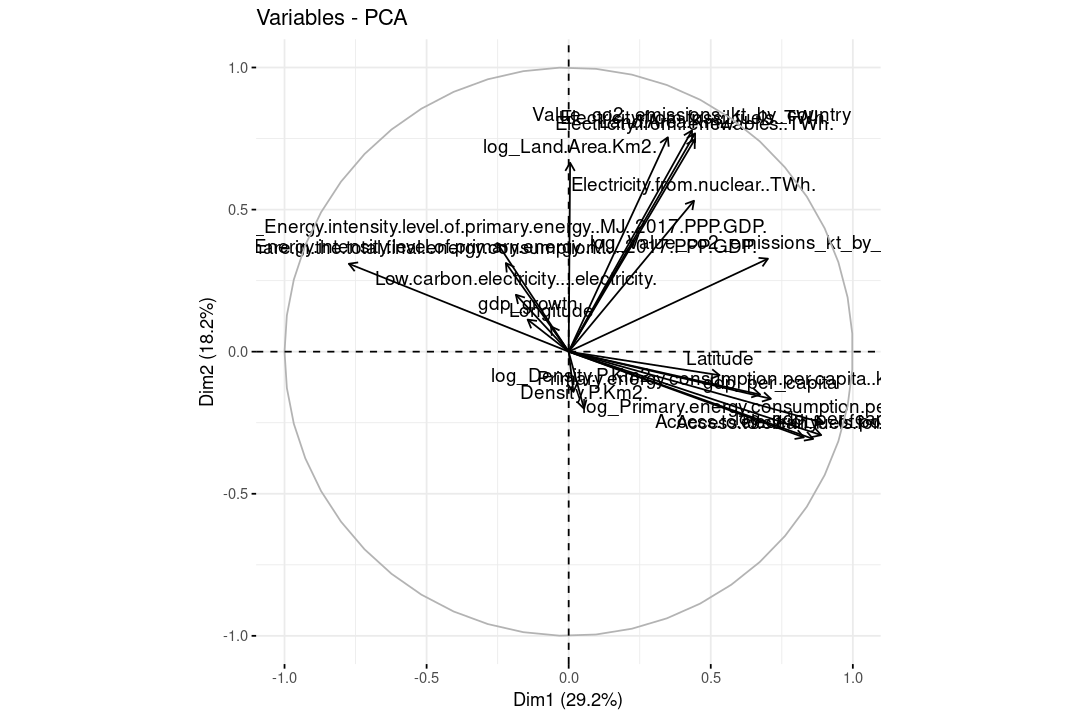

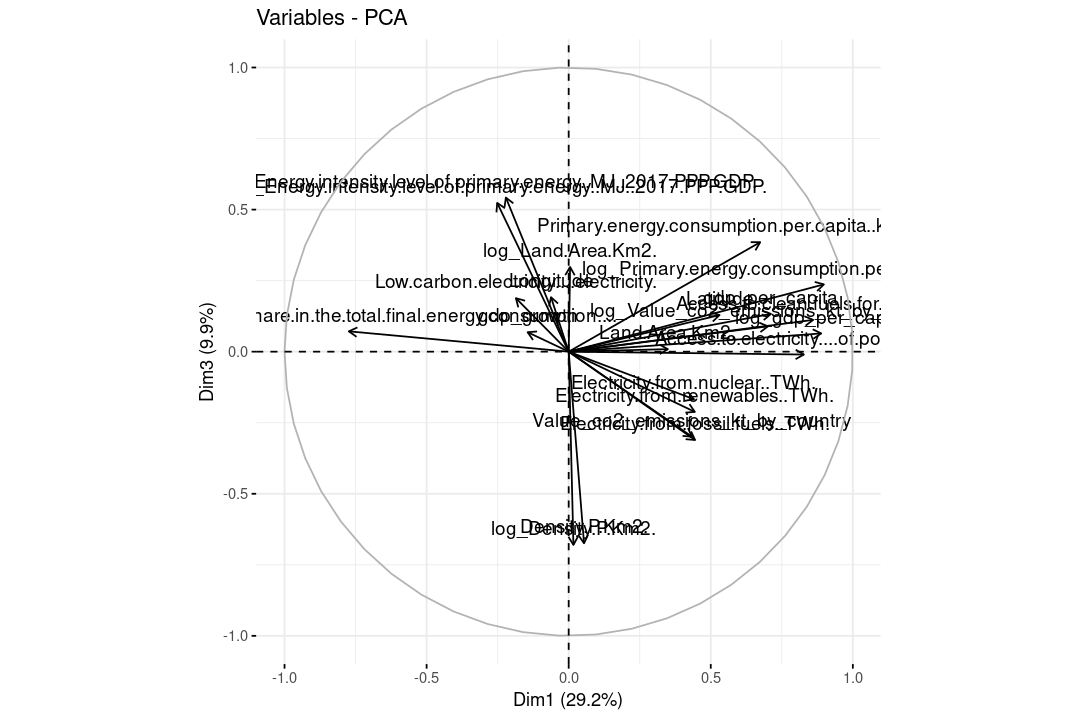

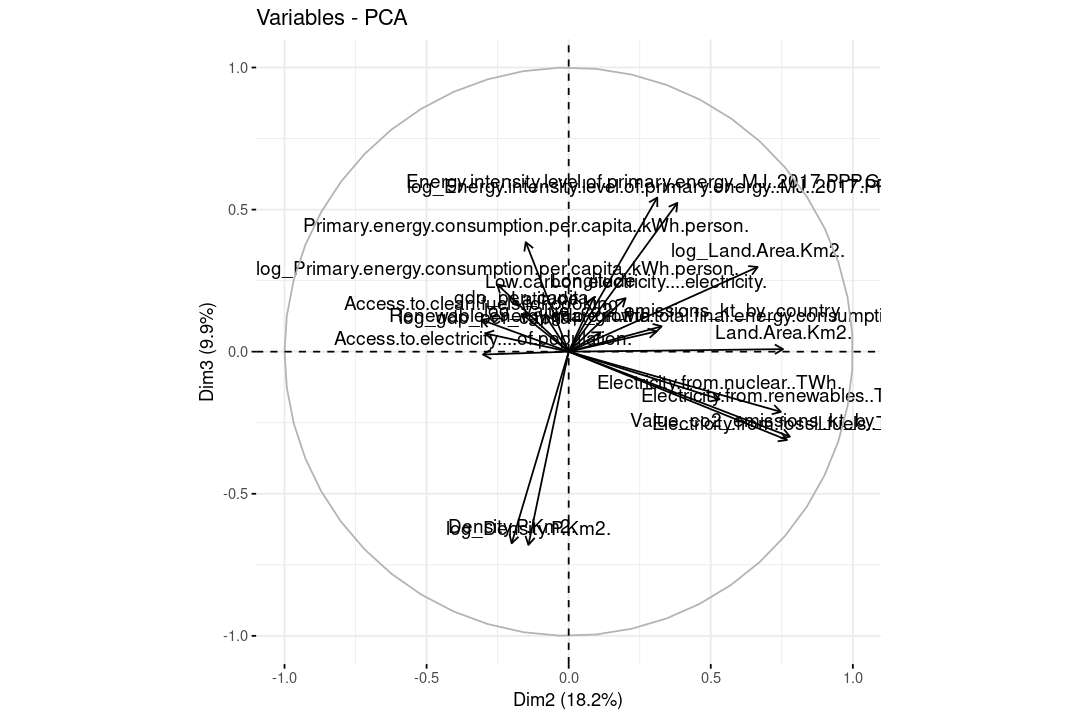

In [27]:
options(repr.plot.width = 9, repr.plot.height = 6)

fviz_pca_var(df_pca)
fviz_pca_var(df_pca, axes=c(1,3))
fviz_pca_var(df_pca, axes=c(2,3))
# à voir

#fviz_pca(df_PCA, axes=c(1,2), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(1,3), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(2,3), geom = c("point"), col.ind="grey")

In [28]:
library(viridis)

Le chargement a nécessité le package : viridisLite



8. Montrer la corrélation entre la variable 'Year' et la variable à prédire

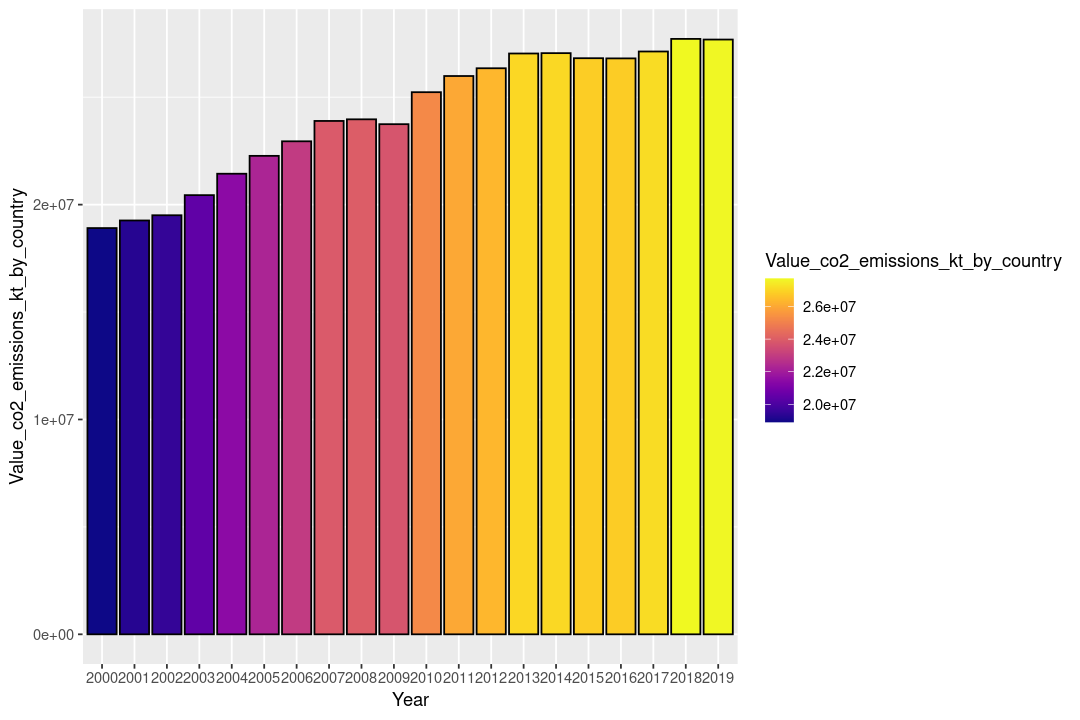

In [29]:
df_somme_annee <- select(df, c(Year, Value_co2_emissions_kt_by_country))
df_somme_annee <- df_somme_annee %>%
    group_by(Year) %>% 
    summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

ggplot(df_somme_annee, aes(x = Year, y = Value_co2_emissions_kt_by_country, fill = Value_co2_emissions_kt_by_country))+
    geom_bar(stat = "identity", color = "black")+
    scale_fill_viridis(option="plasma")

On remarque que les émissions de CO2 sont corrélées avec l'année observée. En effet, ces dernières semblent malheureusement augmenter avec le temps.

# Modélisation

1. Divisez le jeu de données sans données manquantes en un échantillon d’apprentissage et un échantillon
test. Vous prendrez un pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire
lorsque nous nous concentrons sur les performances des algorithmes ?

Cette étape, réalisée ci-dessous, est crutiale pour évaluer les performances des algorithmes car deux jeux de données différents nous permettent d'évaluer différentes erreurs des modèles. Par exemple, le training set, nous servira d'entraînement et permettra d'évaluer l'erreur d'ajustement, tandis que le test set nous permettra de calculer l'erreur de généralisation.

Aussi, nous allons tester nos modèles sur 'Value_co2_emissions_kt_by_country' ainsi que sa transformation logarithmique, ce qui nous demande de créer deux variables y.

In [30]:
#df_norm <- data.frame(df_norm)

set.seed(579) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test

npop <- nrow(df) # nombre de lignes dans les données
nvar <- ncol(df) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio)

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

# construction de l'échantillon d'apprentissage
train <- df[appri, -c(1,2,6,22)]
# construction de l'échantillon test
test <- df[testi, -c(1,2,6,22)]

# construction de l'échantillon d'apprentissage avec la variable à expliquer transformée
train_log <- df[appri, -c(1,2,6,12)]
# construction de l'échantillon test
test_log <- df[testi, -c(1,2,6,12)]

# en R, à la différence de python, on ne différencie pas x_train et y_train

# vérification du contenu des échantillons
str(train)
str(test)

'data.frame':	2294 obs. of  20 variables:
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 42.4 ...
 $ Access.to.clean.fuels.for.cooking                               : num  9.5 10.9 12.2 13.8 16.7 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 33.9 31.9 21.2 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.54 0.78 0.75 0.74 0.89 1 ...
 $ Low.carbon.electricity....electricity.                          : num  67 62.9 63.4 76.2 74 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  230 204 252 304 608 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.4 1.2 1.41 1.5 1.94 2.25 2.46 2.61 2.46 2.25 ...
 $ Value_co2_emissions_kt_by_country                               : num  1220 1030 1550 1760 3560 ...
 $

Conformément à la consigne, nous enlevons la variable Electricity.from.fossil.fuels..TWh., car cette dernière est trop fortement corrélée avec la variable à expliquer (variable 6).

# Entrainement des modèles

2. Comparez les performances d’un modèle de régression linéaire avec/sans sélection de variables, avec/sans pénalisation, d’un SVM, d’un arbre optimal, d’une forêt aléatoire, du boosting, et de réseaux de neurones. Justifiez vos choix (par exemple le noyau pour le SVM), et ajustez soigneusement les paramètres (par validation croisée). Interprétez les résultats et quantifiez l’amélioration éventuelle apportée par les modèles non linéaires.

## Modèles de régression linéaire 

### Modèle de régression linéaire sans pénalisation

Pour un modèle de régression linéaire, seules les variables quantitatives interviennent. C'est pour cela que nous décidons de retirer les colonnes 'Entity' et 'Year' du jeu de données.

In [31]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

On standardise notre jeu de données pour la suite de nos analyses. En effet, pour certains modèles cette standardisation sera bénéfique, et pour d'autres cela n'aura pas d'impact (ex. arbre).

In [32]:
scaled_train <- data.frame(scale(train_log))
scaled_test <- data.frame(scale(test_log))

On créé un modèle de régression linéaire afin de prédire, dans un premier temps, 'Value_co2_emissions_kt_by_country'.

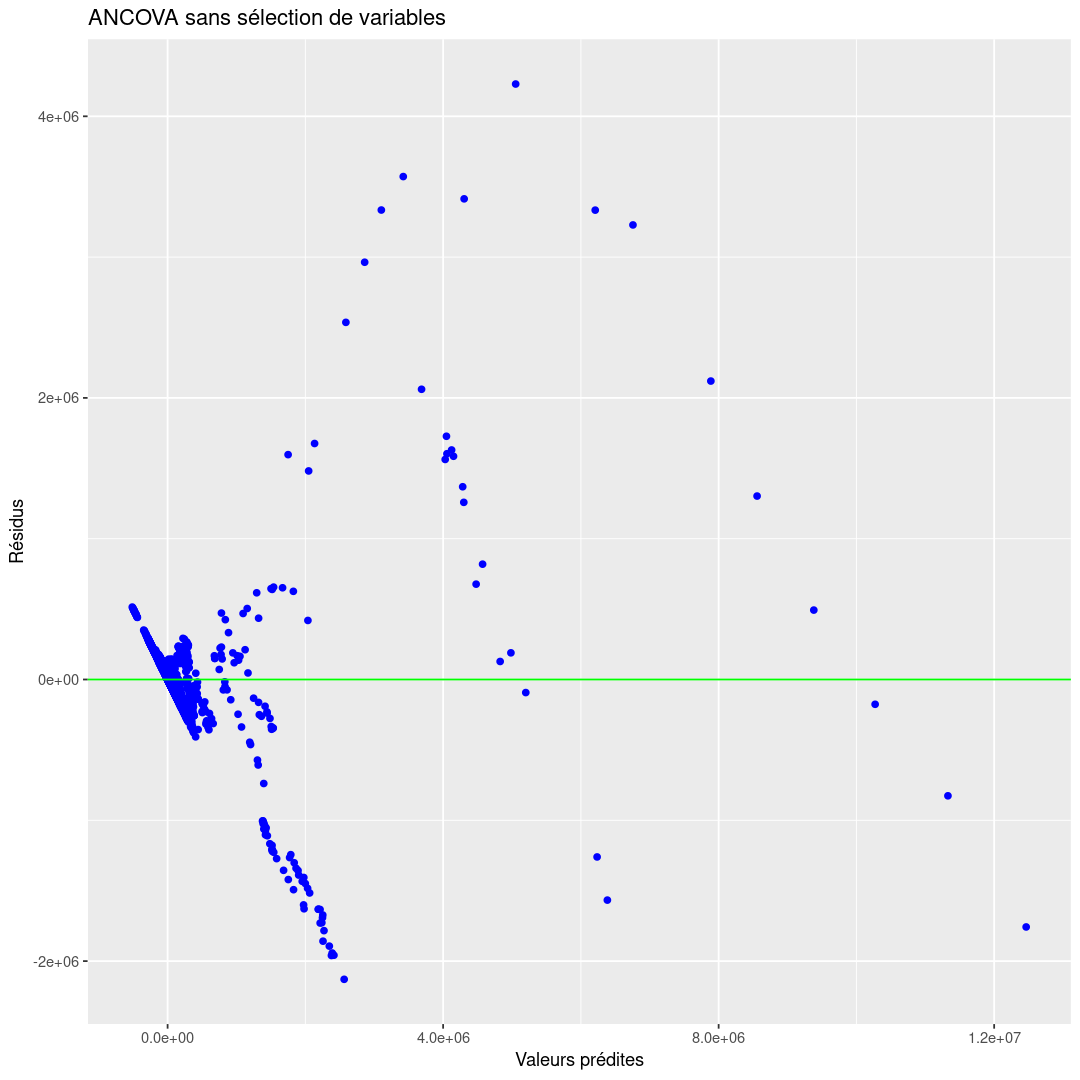

In [56]:
# estimation du modèle sans interaction
reg <- aov(Value_co2_emissions_kt_by_country ~ . , data = train)

# Extraction des résidus et des valeurs ajustées de ce modèle
res <- reg$residuals
fit<- reg$fitted.values

#graphe des résidus

gplot.res(fit,res,"ANCOVA sans sélection de variables")

Calcul du score d'ajustement pour le modèle simple

In [58]:
ss_total <- sum((train$Value_co2_emissions_kt_by_country - mean(train$Value_co2_emissions_kt_by_country ))^2)
ss_residual <- sum(residuals(reg)^2)
ss_regression <- ss_total - ss_residual
r_squared <- ss_regression / ss_total
paste ("Score ajustement modèle simple: " , r_squared)


[1] "Score ajustement modèle simple:  0.826898015815229"

In [59]:
#summary(reg)
options(repr.plot.width = 9, repr.plot.height = 9)

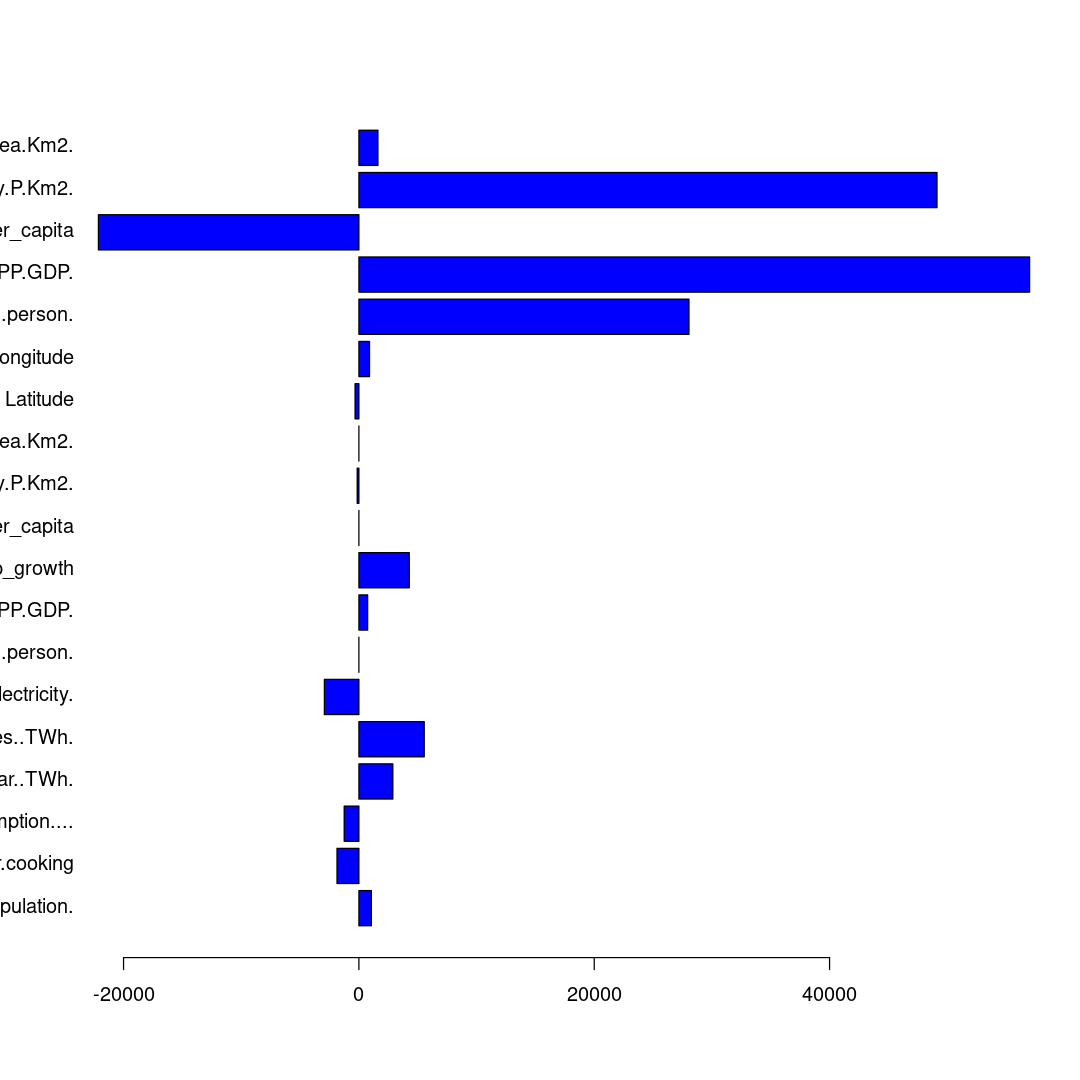

In [60]:
barplot(coef(reg)[2:20], horiz=T, col="blue", las = 1)

De la même manière, on créé un modèle pour prédire la transformée logarithmique de 'Value_co2_emissions_kt_by_country'.

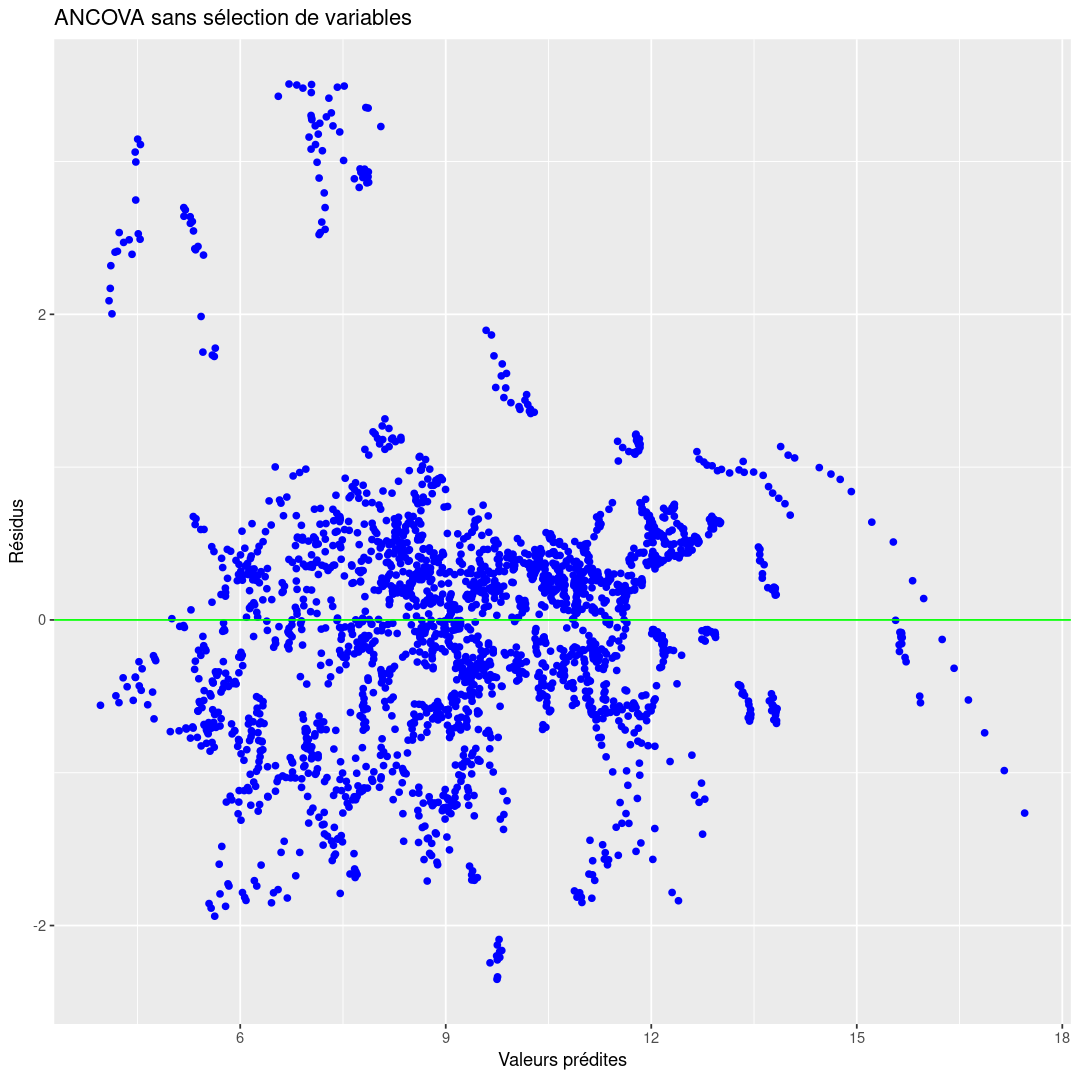

In [61]:
# estimation du modèle sans interaction
reg.log <- aov(log_Value_co2_emissions_kt_by_country ~ . , data = train_log)

# Extraction des résidus et des valeurs ajustées de ce modèle
res2 <- reg.log$residuals
fit2 <- reg.log$fitted.values

# Graphe des résidus. 
gplot.res(fit2,res2,"ANCOVA sans sélection de variables")


Calcul du score d'ajustement du modèle avec la variable transformée

In [62]:
ss_total <- sum((train_log$log_Value_co2_emissions_kt_by_country - mean(train_log$log_Value_co2_emissions_kt_by_country ))^2)
ss_residual <- sum(residuals(reg.log)^2)
ss_regression <- ss_total - ss_residual
r_squared <- ss_regression / ss_total
paste ("Score ajustement modèle transforméev: " , r_squared)


[1] "Score ajustement modèle transforméev:  0.875772154565032"

On peut voir que le graphe des résidus est plus interprétable en utilisant la variable à prédire transformée, et de plus pour ce modèle le score d'ajustement est meilleur. Ainsi, pour la suite on utilisera toujours cette même variable transformée.

### Modèle linaire avec pénalisation LASSO 

In [63]:
library(glmnet)

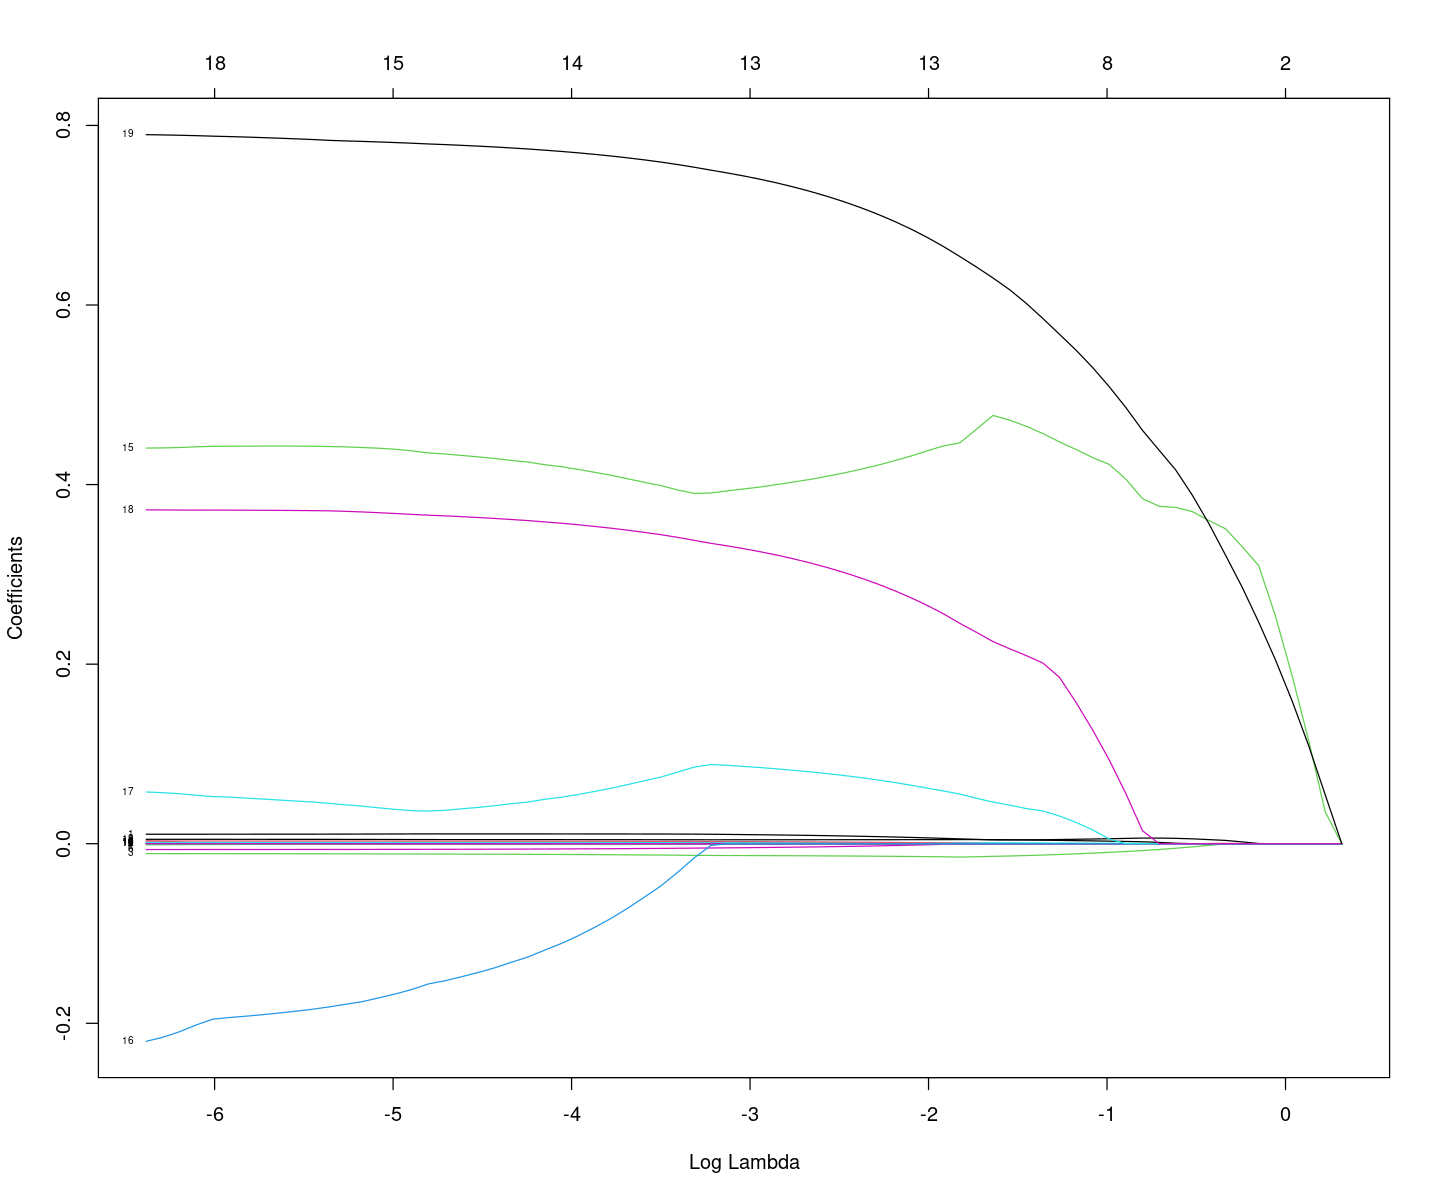

In [64]:
train_log.mat <- model.matrix(log_Value_co2_emissions_kt_by_country ~ . - 1, data = train_log) #on retire l'intercept du modèle 
test_log.mat <- model.matrix(log_Value_co2_emissions_kt_by_country ~ . - 1, data = test_log) #on retire l'intercept du modèle 
# avec des variables quantitatives seulement
regLasso <- glmnet(y = train_log$log_Value_co2_emissions_kt_by_country ,
                           x = train_log.mat )

options(repr.plot.width = 12, repr.plot.height = 10)
plot(regLasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(df.mat), " - ", colnames(df.mat)))


Les chemins de régularisation permettent de comprendre comment les coefficients évoluent en fonction du paramètre de régularisation (lambda). Si les coefficients sont gardés non nul pour une valeur de lambda élévée alors c'est qu'ils sont importants. Ici 3 coefficients semblent sortir du lot : les 15e, 18e et 19e variables. A l'inverse, la variable n°16 est amenée à 0 assez rapidement.

Nous allons choisir le lambda optimal par validation croisée

[1] 0.7330968 0.7747769

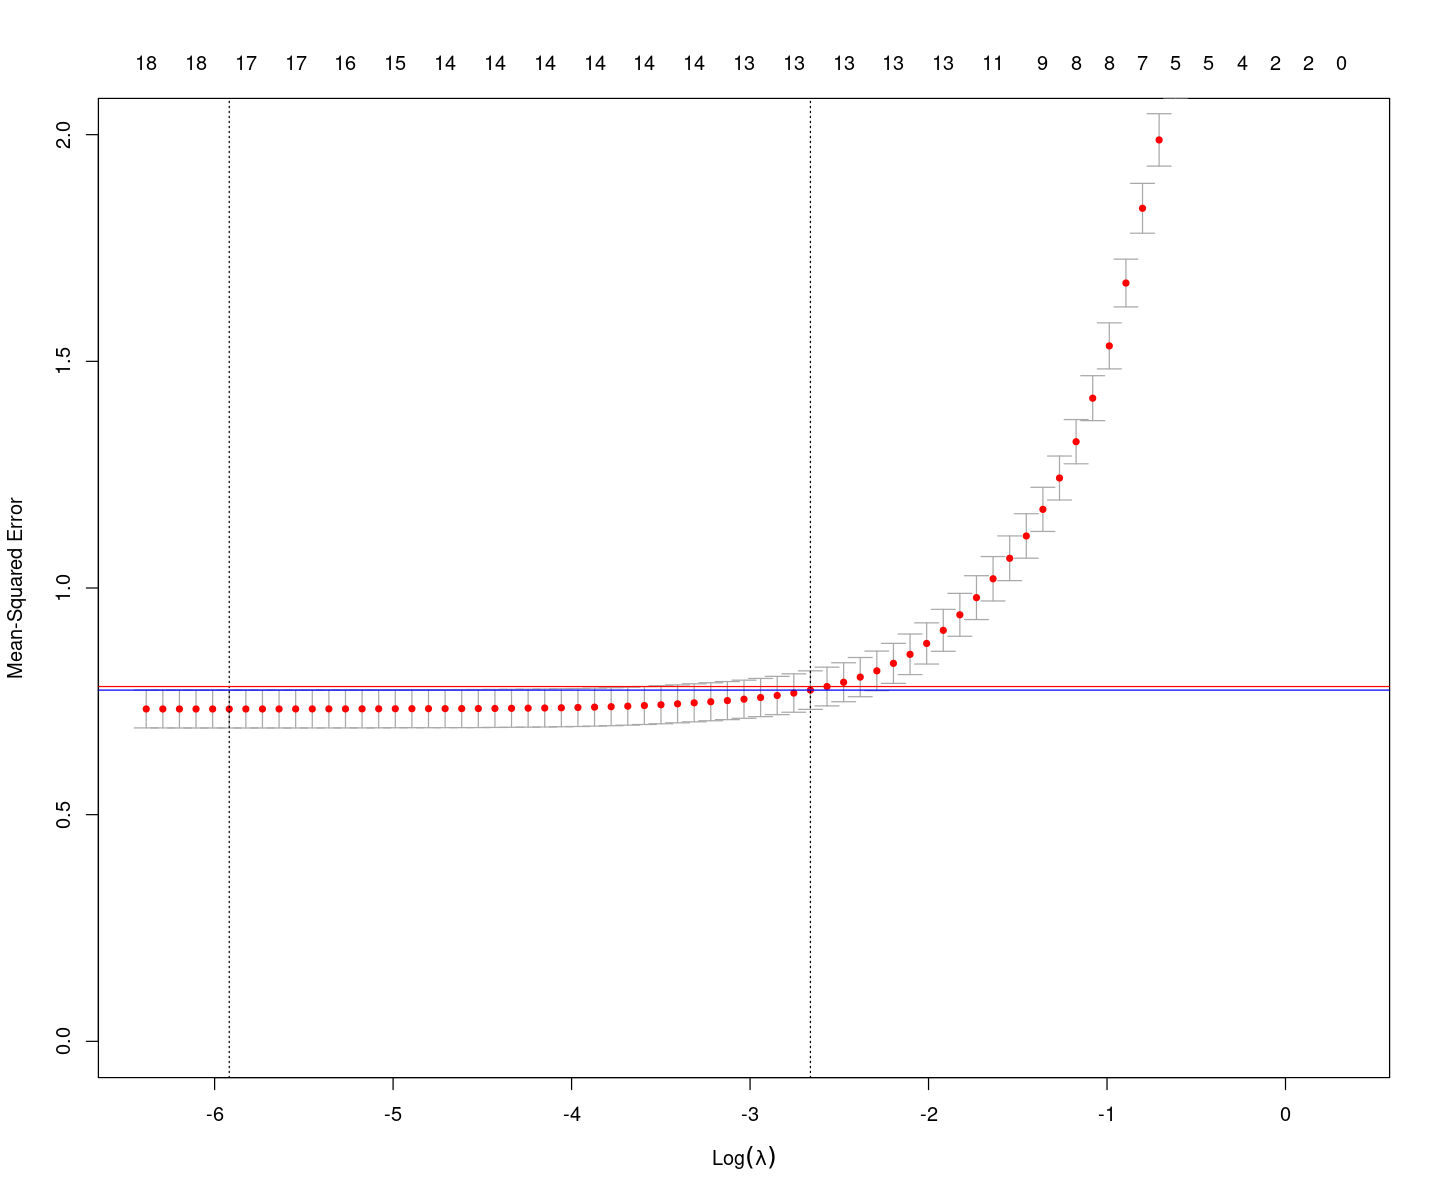

In [65]:
regLassOpt <- cv.glmnet(y = train_log$log_Value_co2_emissions_kt_by_country , x = train_log.mat)
regLassOpt$cvm[c(regLassOpt$index)]

plot(regLassOpt, ylim=c(0,2))
abline(h=regLassOpt$cvm[c(regLassOpt$index)[2]-1], col='red');
abline(h=regLassOpt$cvm[c(regLassOpt$index)[2]], col='blue');


In [68]:
# valeur estimée
paste("1er lambda sélectionné pour modèle optimal:", round(regLassOpt$lambda.1se, 5))
paste("Lambda min. sélectionné pour modèle optimal:", round(regLassOpt$lambda.min, 5))
# modèle correspondant
coef(regLassOpt, s = "lambda.1se")

[1] "1er lambda sélectionné pour modèle optimal: 0.06982"

[1] "Lambda min. sélectionné pour modèle optimal: 0.00269"

20 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                      -5.185358e+00
Access.to.electricity....of.population.                           9.257415e-03
Access.to.clean.fuels.for.cooking                                 .           
Renewable.energy.share.in.the.total.final.energy.consumption.... -1.346551e-02
Electricity.from.nuclear..TWh.                                    6.950706e-04
Electricity.from.renewables..TWh.                                 1.042060e-03
Low.carbon.electricity....electricity.                           -3.618358e-03
Primary.energy.consumption.per.capita..kWh.person.                3.611607e-06
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       .           
gdp_growth                                                        .           
gdp_per_capita                                                    .           
Density.P.

Par validation croisée, on trouve que la valeur de l'hyperparamètre minimal pénalisant la norme l1 optimale est 0.002, ce qui est très faible. Cela explique que peu de valeurs du modèle conservé sont mises à 0, et que la valeur des coefficients pour le modèle LASSO sont proches des coefficients du la régression linéaire.

On récupère les résidus et les valeurs ajustées pour pouvoir afficher par la suite le graphe des résidus

In [67]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(regLassOpt, s = "lambda.min", newx = train_log.mat)
res.lasso <- train_log$log_Value_co2_emissions_kt_by_country - fit.lasso

fit.lasso.1se <- predict(regLassOpt, s = "lambda.1se", newx = train_log.mat)
res.lasso.1se <- train_log$log_Value_co2_emissions_kt_by_country - fit.lasso.1se 

### Sélection de variables par critère AIC

In [75]:
reg.AIC <- step(reg.log, direction = "backward", trace=1)
summary(reg.AIC)

Start:  AIC=-727.9
log_Value_co2_emissions_kt_by_country ~ Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude + log_Primary.energy.consumption.per.capita..kWh.person. + 
    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    log_gdp_per_capita + log_Density.P.Km2. + log_Land.Area.Km2.

                                                                   Df Sum of Sq
- Access.to.clean.fuels.for.cooking                                 1       0.2
- gdp_growth                                                        1       0.2
- Land.Area.Km2.   

                                                                   Df Sum Sq
Access.to.electricity....of.population.                             1   3272
Renewable.energy.share.in.the.total.final.energy.consumption....    1    118
Electricity.from.nuclear..TWh.                                      1   1201
Electricity.from.renewables..TWh.                                   1    787
Low.carbon.electricity....electricity.                              1     34
Primary.energy.consumption.per.capita..kWh.person.                  1     98
gdp_per_capita                                                      1     72
Density.P.Km2.                                                      1     12
Latitude                                                            1    347
Longitude                                                           1    350
log_Primary.energy.consumption.per.capita..kWh.person.              1     98
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     1     76

Arbitrairement la fonction step calcule le critère AIC du modèle linéaire 'reg' et met par défaut le facteur de pénalité égal à 2.

De plus, le paramètre 'trace=0' contrôle le niveau de détail des informations de sortie

On va tenter d'optimiser le modèle de regression linéaire précédent grâce à la fonction 'stepAIC'. Cette fonction retourne le modèle qui minimise l'AIC parmi tous les modèles candidats évalués.

In [76]:
library(MASS)

In [77]:
# Optimisation du modèle avec stepAIC
reg.AIC_opt <- stepAIC(reg.AIC, direction = "both")

# Afficher le résumé du modèle optimisé
summary(reg.AIC_opt)

Start:  AIC=-733.85
log_Value_co2_emissions_kt_by_country ~ Access.to.electricity....of.population. + 
    Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    gdp_per_capita + Density.P.Km2. + Latitude + Longitude + 
    log_Primary.energy.consumption.per.capita..kWh.person. + 
    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    log_gdp_per_capita + log_Density.P.Km2. + log_Land.Area.Km2.

                                                                   Df Sum of Sq
<none>                                                                         
- log_gdp_per_capita                                                1       2.0
- gdp_per_capita                                                    1       3.2
- log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.   1  

                                                                   Df Sum Sq
Access.to.electricity....of.population.                             1   3272
Renewable.energy.share.in.the.total.final.energy.consumption....    1    118
Electricity.from.nuclear..TWh.                                      1   1201
Electricity.from.renewables..TWh.                                   1    787
Low.carbon.electricity....electricity.                              1     34
Primary.energy.consumption.per.capita..kWh.person.                  1     98
gdp_per_capita                                                      1     72
Density.P.Km2.                                                      1     12
Latitude                                                            1    347
Longitude                                                           1    350
log_Primary.energy.consumption.per.capita..kWh.person.              1     98
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     1     76

In [ ]:
# Extraction des résidus et des valeurs ajustées de ce modèle
res.AIC <- reg.AIC_opt$residuals
fit.AIC<- reg.AIC_opt$fitted.values

## Support Vector Machine (SVM)

Nous souhaitons étudier la méthode de la SVM sur nos données. Il faut être attentif ici au fait que la méthode SVM s'applique sur des données standardisées, car elle met en jeu des notions de distances entre les points, qui peuvent être faussées par les diverses unités de nos variables.

In [ ]:
library(e1071)

In [ ]:
La méthode SVM fait intervenir la présence d'un 'noyau'. Ce noyau est défini comme le produit scalaire des entrées projetées dans l'espace complet H de dimension supérieure. Il est de existe plusieurs formes de produits scalaires et donc plusieurs noyaux. (je peux mettre des formules de produits scalaires svv)

- le noyau 'linéaire' 
- le noyau 'polynomial' 
- le noyau 'radial' 

In [ ]:
On optimise les paramètres de tuning par validation croisée pour le modèle avec noyau linéaire.

In [ ]:
svm.reg.tune_lin <- tune.svm(log_Value_co2_emissions_kt_by_country ~ ., data = train_log,  
                             cost = c(10, 100, 1000), eps=seq(0.05, 0.2, by = 0.05), kernel = "linear")

summary(svm.reg.tune_lin$best.model)
svm_lin = svm.reg.tune_lin$best.model

In [ ]:
On optimise les paramètres de tuning par validation croisée pour le modèle avec noyau radial.

In [ ]:
svm.reg.tune_rad <- tune.svm(log_Value_co2_emissions_kt_by_country ~ ., data = train_log,  
                             cost = c(100, 500,1000), gamma = seq(0.005, 0.035, by = 0.01),
                             kernel = "radial")

summary(svm.reg.tune_rad$best.model)
svm_rad = svm.reg.tune_rad$best.model

Call:
best.svm(x = log_Value_co2_emissions_kt_by_country ~ ., data = train_log, 
    gamma = seq(0.005, 0.035, by = 0.01), cost = c(10, 100, 500), 
    kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  500 
      gamma:  0.005 
    epsilon:  0.1 


Number of Support Vectors:  367

In [ ]:
On optimise les paramètres de tuning par validation croisée pour le modèle avec noyau polynomial.

In [ ]:
svm.reg.tune_poly <- tune.svm(log_Value_co2_emissions_kt_by_country ~ ., data = train_log,  
                             cost = c(10, 100, 1000), gamma = seq(0.005, 0.025, by = 0.01), coef0 = c(0, 1, 2),
                             degree = c(2, 3, 4), kernel = "polynomial")

summary(svm.reg.tune_poly$best.model)
svm_poly = svm.reg.tune_poly$best.model

Call:
best.svm(x = log_Value_co2_emissions_kt_by_country ~ ., data = train_log, 
    degree = c(2, 3, 4), gamma = seq(0.005, 0.025, by = 0.01), coef0 = c(0, 
        1, 2), cost = c(10, 100, 1000), kernel = "polynomial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
      gamma:  0.025 
     coef.0:  2 
    epsilon:  0.1 


Number of Support Vectors:  343


In [ ]:
svm_lin = svm.reg.tune_lin$best.model
fit_lin = predict(svm_lin, train_log)
res_lin = fit_lin - train_log$log_Value_co2_emissions_kt_by_country

gplot.res(fit_lin, res_lin, titre = "Meilleur modèle linéaire")

svm_rad = svm.reg.tune_rad$best.model
fit_rad = predict(svm_rad, train_log)
res_rad = fit_rad - train_log$log_Value_co2_emissions_kt_by_country

gplot.res(fit_rad, res_rad, titre = "Meilleur modèle radial")

svm_poly = svm.reg.tune_rad$best.model
fit_poly = predict(svm_poly, train_log)
res_poly = fit_poly - train_log$log_Value_co2_emissions_kt_by_country

gplot.res(fit_poly, res_poly, titre = "Meilleur modèle polynomial")

In [ ]:
svm = svm_rad # meilleur modèle SVM !

svm.fit = predict(svm, log_train)
svm.res = fit - log_train$log_Value_co2_emissions_kt_by_country

## Arbre de régression


In [ ]:
library(rpart)
library(rpart.plot)

Il n'est pas nécessaire de standardiser nos données ici. En effet, cette méthode n'est pas sensible aux unités des variables, ne se basant pas sur des notions de distances.

On renomme ici les variables pour que l'affichage des arbres soit plus joli.

In [ ]:
Train_log_renom <- train_log
Test_log_renom <- train_log

Nouveaux_noms <- c("Access_electricity", "Access_clean_fuels", "Electricity_fossil", "Electricity_nuclear",
                "Electricity_renewables", "Low_carbon_electricity", "Primary_energy_consumption_per_capita",
                "Energy_intensity", "GDP_growth", "GDP_per_capita", "Density", "Land_area", "Latitude",
                "Longitude", "Log_primary_energy_consumption_per_capita", "Log_energy_intensity",
                "Log_gdp_per_capita", "Log_CO2_emissions", "Log_density", "Log_land_area")

names(Train_log_renom) <- Nouveaux_noms
names(Test_log_renom) <- Nouveaux_noms

On génère ici l'arbre de régression basé sur l'ensemble de données 'Train_log_renom'

In [ ]:
tree=rpart(Log_CO2_emissions~.,data=Train_log_renom) #control=rpart.control(cp=0.001)
#Affichage du graphe de l'arbre
options(repr.plot.width = 20, repr.plot.height = 15)
rpart.plot(tree)

On va tenter ici de réduire l'arbre de régression en cherchant le coefficiant 'cp' optimal par validation croisée

In [ ]:
xdf<-xpred.rpart(tree,xval=100) 

# Cross-validation error par valeur de CP
CVerr<-apply((xdf-Train_log_renom$Log_CO2_emissions)^2,2,sum)

plotcp(tree)

On veut la valeur du cp qui correspond à la plus petite erreur.

Une fois que cette valeur est déterminée on affiche l'arbre de régression associé

In [ ]:
print(paste("cp optimisé:",as.numeric(attributes(which.min(CVerr))$names)))
treeOpt=rpart(Log_CO2_emissions~.,data=Train_log_renom,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(treeOpt,type=2,extra="auto")

Voici un autre affichage qui permet de mieux visualiser les variables dans l'arbre

In [ ]:
library(partykit)
plot(as.party(treeOpt), type="simple",cex=0.1)

On récupère ici les résidus et les valeurs prédites pour pouvoir par la suite afficher le graphe des résidus

In [ ]:
fit.tree=predict(treeOpt)
res.tree=fit.tree-Train_log_renom$Log_CO2_emissions

## Forêts aléatoires

L'algorithme random forest est un algorithme d'apprentissage. Il contruit un grand nombre d'arbres de décision où chaque arbre est formé à l'aide d'un échantillon bootstrap des données et en sélectionnant un sous-ensemble aléatoire de variables à chaque nœud de décision. Les prédictions finales sont obtenues en agrégeant les prédictions de tous les arbres, généralement par une moyenne pour les problèmes de régression
 

In [ ]:
library(randomForest)

Dans la commande suivante nous allons créer une foret aléatoire pour tenter d'expliquer la variable 'Value_co2_log'. Les données d'entrainement sur lesquels le modèle va s'appuyer sont 'datappr'.

Le paramètre 'ntre' spécifie le nombre d'arbres à inclure dans la foret aléatoire.

Le paramètre 'mtry'donne le nombre de variables à sélectionner à chaque fractionnement de l'arbre (par défaut il est ici égal à floor(ncol(datappr)/3)=4 )

Le paramètre 'do.trace' signifie que l'on peut suivre les performances du processus jusqu'à ce que 50 arbres maximum soient construits.

In [ ]:
random_forest = randomForest(x=train_log, y=train_log$log_Value_co2_emissions_kt_by_country, xtest=test_log, ytest=test_log$log_Value_co2_emissions_kt_by_countr, ntree=1000,do.trace=50,importance=TRUE, mtry=3)

On cherche à minimiser le critère Out-Of-Bag pour trouver le nombre d'arbre adéquat.

Validation croisée à l'aide de la fonction 'rfcv' dans le package random forest :

In [ ]:
random_forestOpt=rfcv(train_log, train_log$log_Value_co2_emissions_kt_by_country, nfold=10)
#print(random_forestOpt)
nb_opt <- which.min(random_forestOpt$error.cv)
random_forestOpt=randomForest(log_Value_co2_emissions_kt_by_country ~ ., data = train_log, mtry = nb_opt)

On récupère ici les résidus et les valeurs ajustées

In [ ]:
random_forestOpt

In [ ]:
fit.rfr=random_forestOpt$predicted
res.rfr=fit.rfr-train_log$log_Value_co2_emissions_kt_by_country

Nous allons afficher l'importance de chaque variable dans la prédiction du résultat:

In [ ]:
#attributes(rf.reg)
#random_forest$importance
print('-----Classement des variables selon leur importance------')
sort(round(importance(random_forestOpt), 2)[,1], decreasing=TRUE)
varImpPlot(random_forestOpt)

Les variables les plus influentes dans la prédiction de ce modèle sont 'Electricity.from.renewables..TWh.' et 'Electricity.from.nuclear..TWh.'

## Boosting

Le boosting est une technique d'ensemble en apprentissage automatique qui combine plusieurs modèles faibles pour créer un modèle plus performant. Cette méthode se base sur l'ajustement de modèles successifs de manière à corriger les erreurs des modèles précédents. 

In [ ]:
library(gbm)

In [ ]:
boost.reg = gbm(log_Value_co2_emissions_kt_by_country ~ ., data = train_log, distribution = "gaussian", 
                n.trees = 10000, cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.01, verbose = FALSE)

In [ ]:
summary(boost.reg)

La méthode de gradient boosting nous renvoie l'influence relative des variables (en %) dans l'explication notre variable à expliquer : le logarithme des émissions en co2 de chaque pays.

In [ ]:
# nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(boost.reg,method="cv")

In [ ]:
fit.boost = boost.reg$fit
res.boost = fit.boost - train_log$log_Value_co2_emissions_kt_by_country

Test de la fonction boost en faisant varier le coef de rétrecissement

In [ ]:
print(train_log$log_Value_co2_emissions_kt_by_country)

## Réseaux de neurones

Enfin, on prédit notre modèle en utilisant l'algorithme des réseaux de neurones. Cette méthode consiste à générer un grand nombre d’arbres de décision et à effectuer des moyennes ou des « règles de majorité » à la fin du processus pour prédire la variable voulue.

Rmq : ici encore on ne doit pas standardiser nos données car cet algorithme ne fait pas appelle à des notions de distance entre des points.

La librairie 'nnet' permet de créer des modèle de réseaux de neurone pour la régression. 
Ici, on crée un modèle où la cible à prédire est 'Value_co2_log' et où les variables explicatives seront 'datappr'.

Le paramètre 'size' spécifie le nimbre de neurones dans la couche cachée du réseau.
Le paramètre 'decay' permet de controler le taux de régularisation appliqué aux poids du modèle pour éviter le surajustement.
Le paramètre 'maxit' spécifie le nombre maximum d'itérations d'entraînement à effectuer.

Le paramètre 'linout = TRUE' indique que la sortie du réseau de neurones sera linéaire.

In [ ]:
library(nnet)
library(e1071)

Optimisation des paramètres par validation croisée :
<br> On recherche ici à ajuster les hyper-paramètres. On va chercher la meilleure combinaison de taille de la couche cachée ('size') et de taux de régularisation ('decay')

In [ ]:
nnet_tuned <- tune.nnet(log_Value_co2_emissions_kt_by_country ~.,data=train_log, size=c(10,100,1000),
                        decay=1:10, maxit=500,linout=TRUE)

In [ ]:
plot(nnet_tuned)

En python, on trouve que les paramètres optimaux sont : 1000 neurones, pour une couche cachée. Cependant, à cause de l'incapacité en R d'utiliser le GPU pour accélérer le processus, il nous est pas possible de tester des réseaux de neurones à plus de 5 neurones. On optimise les paramètres sur 

In [ ]:
nnet_tuned <- tune.nnet(log_Value_co2_emissions_kt_by_country ~.,data=train_log, size=seq(1,5), decay=c(1,2,3), 
               maxit=500,linout=TRUE)

plot(nnet_tuned)

In [ ]:
summary(nnet_tuned)

Quelle combinaison de paramètres donne la meilleure performance ? 

In [ ]:
optimal_size = nnet_tuned$best.parameters$size
optimal_decay = nnet_tuned$best.parameters$decay

On genere ci-dessous le réseau de neurones résultant de notre choix de paramètres précédent.

In [ ]:
nnetOpt_linout=nnet(log_Value_co2_emissions_kt_by_country~.,data=train_log,size=optimal_size,decay=optimal_decay,linout=TRUE,maxit=1000)

In [ ]:
nnetOpt_entropy = nnet(log_Value_co2_emissions_kt_by_country~.,data=train_log,size=optimal_size,decay=optimal_decay,entropy=TRUE,maxit=1000)

In [ ]:
nnet_tuned_entropy <- tune.nnet(log_Value_co2_emissions_kt_by_country ~.,data=train_log, size=seq(1,5), decay=c(1,2,3), 
               maxit=500,entropy=TRUE)

plot(nnet_tuned_entropy)

Récupération des résidus et des valeurs ajustée

In [ ]:
fit.nnetOpt=predict(nnetOpt_linout,data=train_log)
res.nnetOpt=fit.nnetOpt-train_log$log_Value_co2_emissions_kt_by_country

## COMPARAISON DES DIFFERENTS MODELES

Graphe des résidus des différents modèles

In [ ]:
#modèle de régréssion linéaire simple
plot1 <- gplot.res(fit2,res2,"ANCOVA sans sélection de variables")
#modèle linéaire avec pénalisation Lasso
plot2 <-gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
plot3 <-gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 
# Modèle de régression linéaire par sélection de variables par critère AIC
plot4 <-gplot.res(fit.AIC,res.AIC,"Modèle avec sélection de variable AIC")
#SVM
plot5 <-gplot.res(fit.svm,res.svm,"SVM Gaussien")
plot5.1 <-gplot.res(fit.svm,res.svm,"SVM Polynomial")
plot5.2 <-gplot.res(fit.svm,res.svm,"SVM Linéaire")
#Arbre de régression : forme particulière car prédiction constante par morceaux
plot6 <-gplot.res(fit.tree,res.tree,"Arbre de régression linéaire optimisé")
#Forêt aléatoire
plot7 <-gplot.res(fit.rfr,res.rfr,titre="Modèle de régression par Forêt aléatoire")
#Boosting
plot8 <-gplot.res(fit.boost,res.boost,titre="Modèle de boosting")
#Réseau de neurones
plot9 <-gplot.res(fit.nnetOpt,res.nnetOpt,titre="Modèle de Réseau de Neurones")

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot5.1, plot5.2, plot6, plot7, plot8, plot9, ncol=3)

In [ ]:
gplot.res(fit.nnetOpt,res.nnetOpt,titre="Modèle de Réseau de Neurones")

Critère MSE des différents modèles

In [ ]:
paste("Modèle linéaire sans sélection:",mean(res2^2))
paste("LASSO avec lambda.min:",mean(res.lasso^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))
paste("Sélection de variables par critère AIC (facteur de pénalité 2):" , mean(res.AIC_2^2))
paste("Sélection de variables par critère AIC (facteur de pénalité 4):", mean(res.AIC_4^2))
paste("Meilleur noyau SVM:", mean(res.svm^2))
paste("Modèle par arbre de régression:", mean(res.tree^2))
paste("Modèle pour forêt aléatoire:", mean(res.rf^2))
paste("Modèle de boosting:", mean(res.boost^2))
paste("Réseau de neurones:", mean(res.nnetOpt^2))

# Prédiction des modèles

## Modèle de régression linéaire

### Modèle de régression linéaire sans pénalisation

Prévision de l'échantillonage test

In [ ]:
pred.reg <- predict(reg.log, newdata = test_log)

### Modèle de régression linéaire avec pénalisation LASSO

Prévision de l'échantillonage test

In [ ]:
pred.regLasso <- predict(regLassOpt, newx = test_log.mat)

### Sélection de variables par critère AIC

Prévision de l'échantillonage test

In [ ]:
pred.regAIC <- predict(reg.AIC_2, newdata = test_log)

## Support Vector Machine

Prévision de l'échantillonage test

In [ ]:
pred.svm = predict(svm, newdata = test_log)

## Arbre de régression

Prévision de l'échantillonage test

In [ ]:
pred.treer=predict(treeOpt, newdata=Test_log_renom)

## Forêt aléatoire

Prédiction du modèle

In [ ]:
pred.rf = predict(random_forestOpt , newdata=test_log)
#random_forestOpt$test$predicted

## Boosting

Prédiction du modèle

In [ ]:
pred.boostr=predict(boost.reg, newdata=test_log, n.trees=best.iter)

## Réseaux de neurones

Prédiction du modèle

In [ ]:
pred.nnetOpt=predict(nnetOpt,newdata=test_log)

## COMPARAISON DES MODELES

In [ ]:
On affiche ci-dessous les erreurs de prévision moyenne

In [ ]:
#Modèle de régression linéaire
sum((pred.reg - test_log$log_Value_co2_emissions_kt_by_country)^2) / nrow(test_log)
#Modèle de régression linéaire avec pénalisation LASSO
sum((pred.regLasso - test_log$log_Value_co2_emissions_kt_by_country)^2) / nrow(test_log)
#Modèle de régression linéaire avec sélection de variable par critère AIC
sum((pred.regAIC - test_log$log_Value_co2_emissions_kt_by_country)^2) / nrow(test_log)
#SVM
sum((pred.svm - test_log$log_Value_co2_emissions_kt_by_country)^2) / nrow(test_log)
#Modèle de l'arbre de régression
sum((pred.treer-Test_log_renom$Log_CO2_emissions)^2)/nrow(Test_log_renom)
#Modèle de forêt aléatoire
sum((pred.rf-test_log$log_Value_co2_emissions_kt_by_country)^2)/nrow(test_log)
#Boosting
sum((pred.boostr-test_log$log_Value_co2_emissions_kt_by_country)^2)/nrow(test_log)
#Réseau de neurones
sum((pred.nnetOpt-test_log$log_Value_co2_emissions_kt_by_country)^2)/nrow(test_log)

Boxplot des mse (en python les bons modeles sont normalement random forest, svm_poly et jsp)
faire ces modèles sur les jeux de données complétés

# Complétion des données manquantes :

Avant de commencer, il faut enlever les individus qui ont des valeurs NA dans la variable à prédire. Ensuite on peut diviser nos données en train et test et emchainer sur la complétion des données manquantes 

In [ ]:
df_na <- df_na[!is.na(df_na, target.colnames = c('log_Value_co2_emissions_kt_by_country'))]

In [ ]:
summary(df_na)

On garde seulement les variables quantitatives pour comparer les différentes méthodes de complétion 

In [ ]:
Xnaquanti=df_na[,-c(1,2)] #avec valeurs NA
ind.na=which(is.na(Xnaquanti),arr.ind=TRUE)
ind.na.CO2 = which(is.na(Xnaquanti$Value_co2_emissions_kt_by_country),arr.ind=TRUE)

Rappel de la proportion de valeur manquante dans notre dataframe df 

In [ ]:
gg_miss_var(Xnaquanti)

On enlève également du dataframe les variables qui contiennent trop de valeurs manquantes, ce n'est pas intéressant de les compléter car on manque d'information.

In [ ]:
Xnaquanti=df_na[,-c(1,2,5,6,15)] 
gg_miss_var(Xnaquanti)

#### 1. Complétion par la moyenne

In [ ]:
moy<- colMeans(Xnaquanti, na.rm = TRUE) #on calcule la moyenne de chaque colonne du dataframe
X_moy=Xnaquanti
ind.na=which(is.na(X_moy),arr.ind=TRUE) #on cherche les indices pour lesquels il y a un NA dans le dataframe
X_moy[ind.na]=moy[ind.na[,2]] #on remplace les valeurs NA par la moyenne de la colonne correspondante
gg_miss_var(X_moy)

On voit bien qu'on n'a plus aucune valeur NA.

#### 2. Complétion par la médiane

In [ ]:
med=apply(Xnaquanti,2,median,na.rm=TRUE)
X.med=Xnaquanti
ind.na=which(is.na(X.med),arr.ind=TRUE)
X.med[ind.na]=med[ind.na[,2]]
gg_miss_var(X.med)

#### 3. Complétion par la derniere valeur connue

In [ ]:
library(zoo) 
X.locf=na.locf(Xnaquanti,na.rm=FALSE) #parcours dans un sens 
X.locf=na.locf(X.locf,na.rm=FALSE,fromLast=TRUE)  #parcours dans l'autre sens 
gg_miss_var(X.locf)

#### 4. Complétion par les k plus proches voisins

L'algorithme de complétion KNN (K-Nearest Neighbors) impute les valeurs manquantes en remplaçant chaque valeur manquante par la moyenne ou la médiane des valeurs des k voisins les plus proches dans l'espace des caractéristiques.

L'argument 'k=5' spécifie que pour chaque valeur manquante, l'algorithme kNN utilisera les 5 voisins les plus proches pour estimer la valeur manquante.

In [ ]:
library(VIM)
X.kNN=kNN(Xnaquanti, k=5, imp_var=FALSE) 
gg_miss_var(X.kNN)

#### 5. Complétion par MissForest

MissForest est une méthode d'imputation des données manquantes qui utilise des forêts aléatoires. Elle remplace les valeurs manquantes en utilisant des prédictions basées sur les données observées dans les autres variables. Ce processus est itératif et se poursuit jusqu'à convergence. 

In [ ]:
library(missForest)
X.mf=missForest(Xnaquanti,xtrue=Xquanti,maxiter=100)
gg_miss_var(X.mf)

#### 6. Complétion par Amélia II

Cette méthode est appelée méthode de l'imputation multiple et consiste à imputer m valeurs pour chaque cellule manquante dans le dataframe et à créer m ensembles de données "complétées". (les valeurs observées sont les mêmes, mais les valeurs manquantes sont remplies avec différentes imputations).

In [ ]:
library(Amelia)
nb.amelia = 5
X.amel = amelia(Xnaquanti, m=nb.amelia)
gg_miss_var(X.amel)